In [3]:
pip install missingpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.7 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
pip install missingno fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=7c36076b741a19274314fd0e79f43ad82c0e885b6ea0624ff1b715dd5dbd7b68
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=bd2d811e60529a902db198a1228aadddd648171417b8b14c57fdc9dbc4bb169c
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


<ipython-input-11-733a50116fd4>:12: DtypeWarning: Columns (2,3,4,5,6,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80352 entries, 0 to 80351
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    80351 non-null  object 
 1   Time    67272 non-null  object 
 2   SO2     32086 non-null  object 
 3   NO      54328 non-null  object 
 4   NO2     52022 non-null  object 
 5   NOX     57691 non-null  object 
 6   CO      45080 non-null  object 
 7   CO8hr   46704 non-null  float64
 8   O3      48362 non-null  object 
 9   O3 8hr  49856 non-null  float64
 10  PM2.5   54408 non-null  object 
 11  PM10    62792 non-null  object 
dtypes: float64(2), object(10)
memory usage: 7.4+ MB
None
Number of missing values in Date: 1
Number of missing values in Time: 13080
Number of missing values in SO2: 48266
Number of missing values in NO: 26024
Number of missing values in NO2: 28330
Number of missing values in NOX: 22661
Number of missing values in CO: 35272
Number of missing values in CO8hr: 33648
Numbe

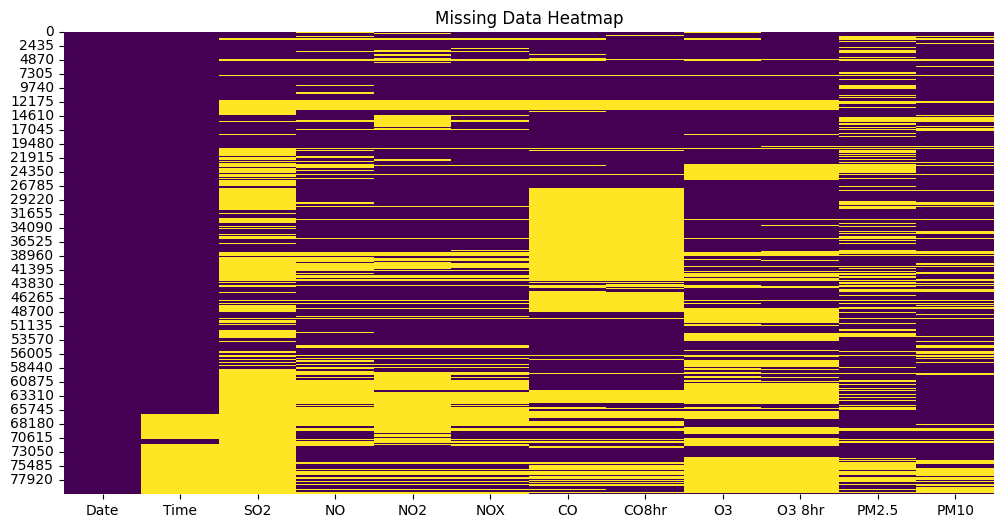

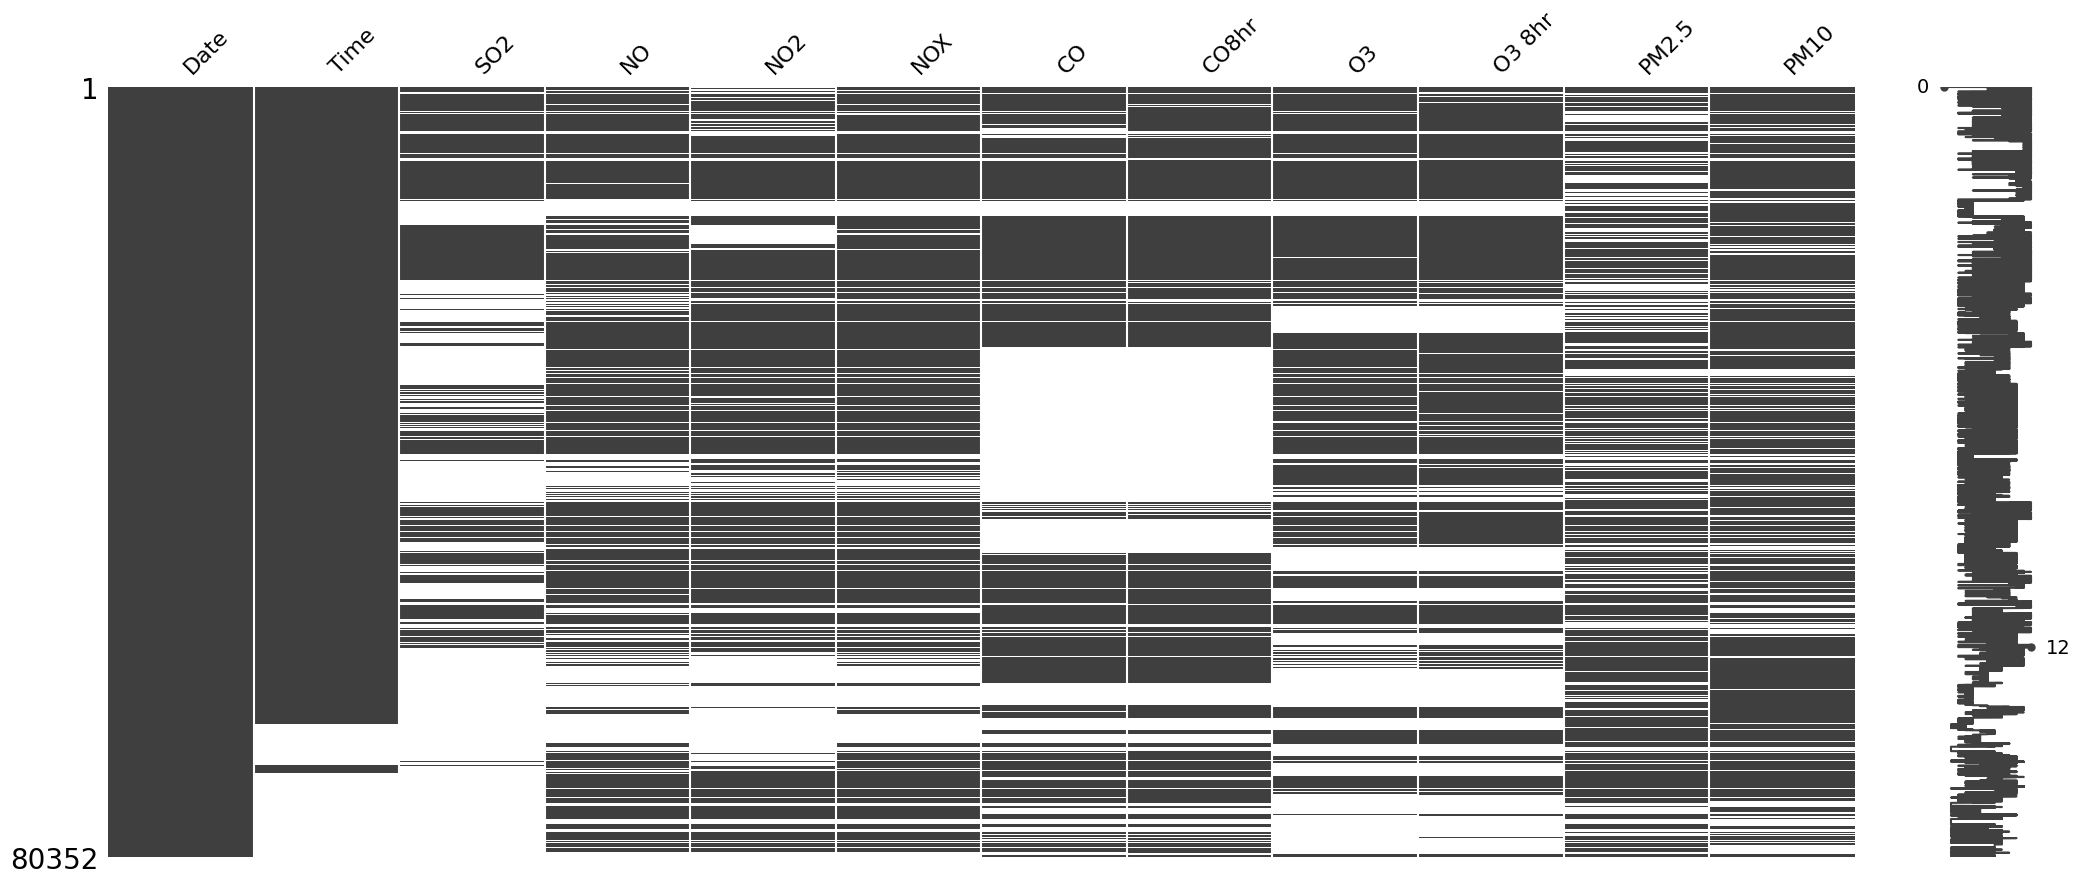

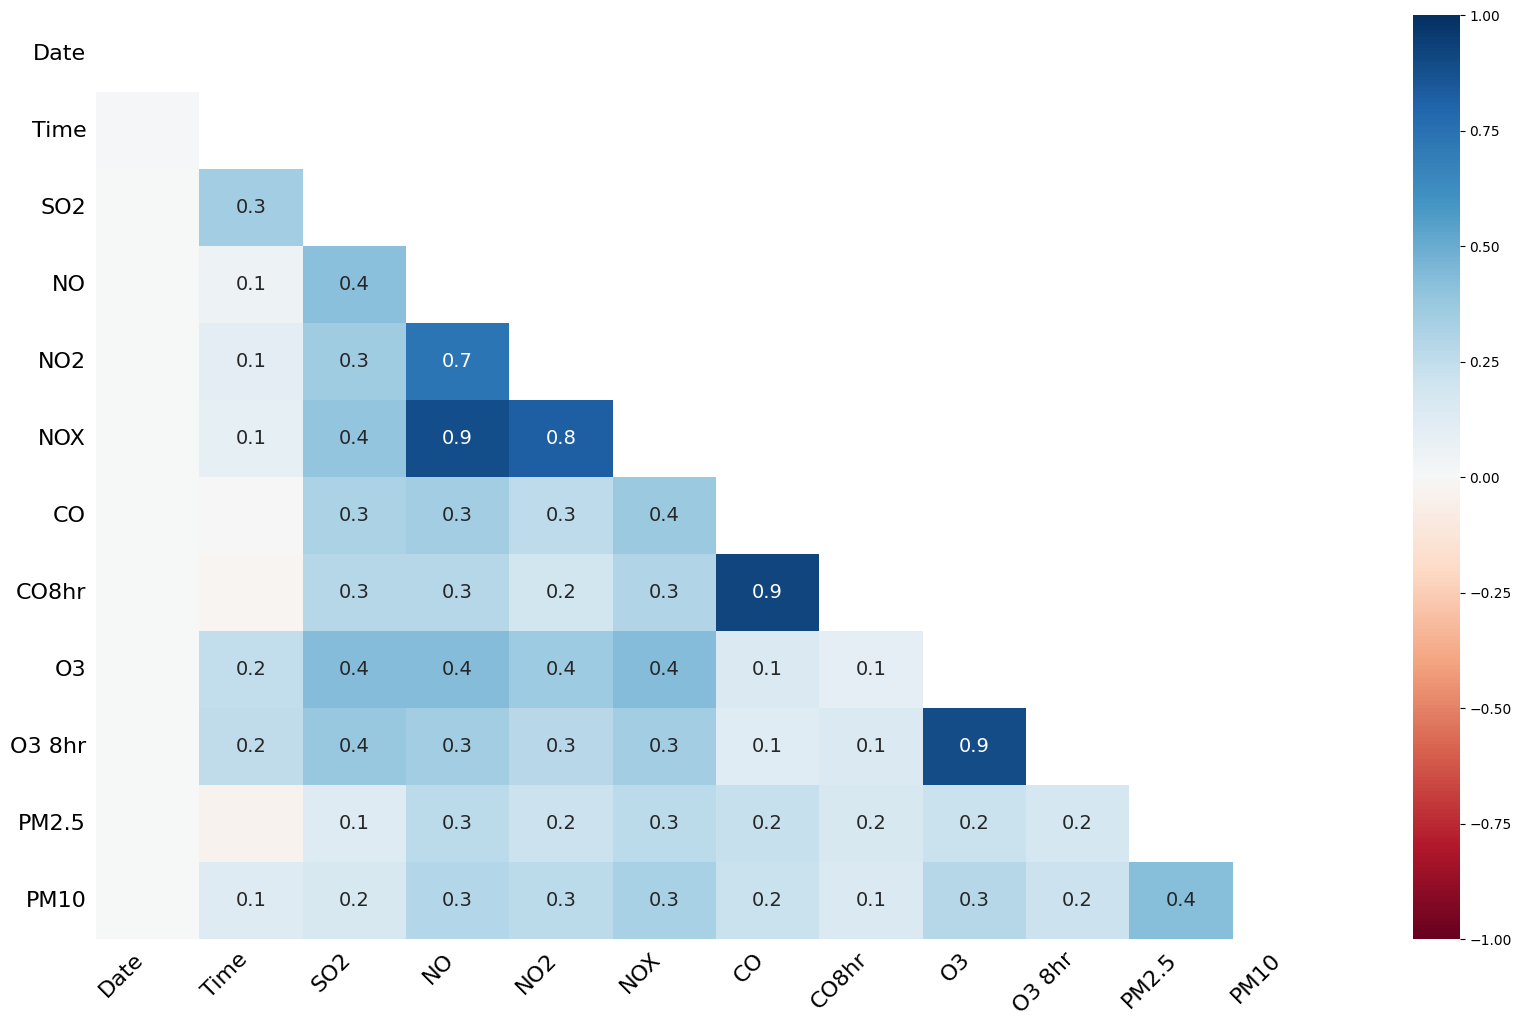

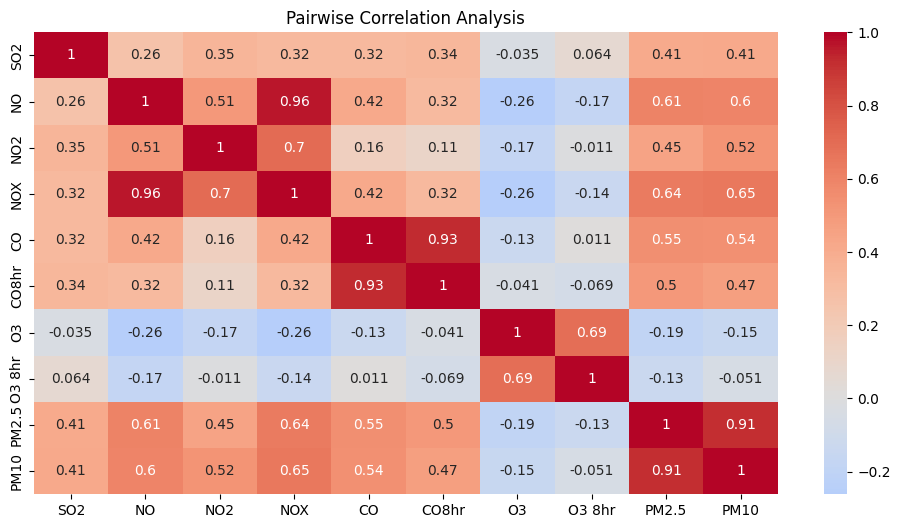

             SO2        NO       NO2       NOX        CO     CO8hr        O3  \
SO2     1.000000  0.256828  0.345560  0.320270  0.324972  0.339311 -0.035175   
NO      0.256828  1.000000  0.506663  0.963559  0.419501  0.315786 -0.261614   
NO2     0.345560  0.506663  1.000000  0.702614  0.158629  0.112013 -0.170833   
NOX     0.320270  0.963559  0.702614  1.000000  0.423132  0.324930 -0.260724   
CO      0.324972  0.419501  0.158629  0.423132  1.000000  0.925161 -0.131652   
CO8hr   0.339311  0.315786  0.112013  0.324930  0.925161  1.000000 -0.041436   
O3     -0.035175 -0.261614 -0.170833 -0.260724 -0.131652 -0.041436  1.000000   
O3 8hr  0.064094 -0.173752 -0.011353 -0.139737  0.011365 -0.069459  0.689954   
PM2.5   0.411271  0.607044  0.446647  0.638459  0.551083  0.502707 -0.191222   
PM10    0.414516  0.595067  0.522658  0.649598  0.541644  0.469712 -0.148532   

          O3 8hr     PM2.5      PM10  
SO2     0.064094  0.411271  0.414516  
NO     -0.173752  0.607044  0.595067  
NO

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer
import numpy as np
from scipy import stats

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality.csv'  # Update with your file path
data = pd.read_csv(file_path)
# Display basic information about the dataset
# Count missing values in each column
missing_values_count = data.isnull().sum()

print(data.info())
# Print the number of missing values with a message
for column, count in missing_values_count.items():
    print(f"Number of missing values in {column}: {count}")

print(data.head())

# Convert relevant columns to numeric, handle errors by setting them as NaN
columns_to_convert = ['SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM2.5', 'PM10']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Display the data types after conversion
print(data.dtypes)

# Visualize missing data heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Visualize missing data matrix
msno.matrix(data)
plt.show()

# Visualize missing data correlations
msno.heatmap(data)
plt.show()

# Exclude 'Date' and 'Time' columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Visualize pairwise correlation analysis
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pairwise Correlation Analysis')
plt.show()

print(correlation_matrix)

# Perform Little's MCAR test
def little_mcar_test(data):
    data = data.copy()
    data = data.apply(pd.to_numeric, errors='coerce')
    n_rows = data.shape[0]
    n_cols = data.shape[1]
    observed_values = data.notnull().values
    missing_pattern_counts = np.dot(1 - observed_values.T, observed_values).astype(np.int32)
    p_values = []
    for i in range(n_cols):
        col_observed_values = observed_values[:, i]
        missing_col_count = np.sum(~col_observed_values)
        observed_col_count = n_rows - missing_col_count
        contingency_table = np.array([
            [missing_col_count, n_rows - missing_col_count],
            [np.sum(missing_pattern_counts[i, :]), np.sum(missing_pattern_counts[:, i])]
        ])
        _, p_value, _, _ = stats.chi2_contingency(contingency_table, correction=False)
        p_values.append(p_value)
    overall_p_value = np.mean(p_values)
    return overall_p_value

# Run Little's MCAR test
p_val = little_mcar_test(numeric_data)
print(f"Little's MCAR test p-value: {p_val}")

if p_val > 0.05:
    print("The missing data is MCAR.")
else:
    print("The missing data is not MCAR.")


In [49]:
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality.csv'
data = pd.read_csv(file_path, low_memory=False)

import pandas as pd
from fancyimpute import IterativeImputer



# Drop rows where 'Date' or 'Time' is missing
data = data.dropna(subset=['Date', 'Time'])

# Convert relevant columns to numeric, handle errors by setting them as NaN
columns_to_convert = ['SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM2.5', 'PM10', 'CO8hr', 'O3 8hr']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Use Iterative Imputer (MICE method) for numeric columns
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
data[columns_to_convert] = iterative_imputer.fit_transform(data[columns_to_convert])

# Check the results
print(data.head())
print(data.isnull().sum())




<ipython-input-49-90196f112d55>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = pd.to_numeric(data[column], errors='coerce')


        Date  Time   SO2     NO       NO2    NOX    CO     CO8hr    O3  \
1  11/1/2012  1:00  5.05  28.12  0.030000  22.12  0.88  0.760599  0.18   
2  11/1/2012  2:00  6.23  32.70  0.040000  26.84  0.86  0.745148  0.21   
3  11/1/2012  3:00  6.30  37.50 -4.819841  31.43  0.83  0.847697  0.19   
4  11/1/2012  4:00  6.32  43.44  0.040000  37.55  0.81  0.691903  0.23   
5  11/1/2012  5:00  6.00  43.33  0.030000  36.56  0.79  0.698684  0.12   

     O3 8hr   PM2.5    PM10  
1  1.976776   68.32   84.27  
2  1.959375   79.02  100.74  
3  0.610733  110.64  133.44  
4  1.814087   97.79  125.52  
5  1.549301  120.86  142.32  
Date      0
Time      0
SO2       0
NO        0
NO2       0
NOX       0
CO        0
CO8hr     0
O3        0
O3 8hr    0
PM2.5     0
PM10      0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<ipython-input-50-2f0990b4c8fd>:2: DtypeWarning: Columns (2,3,4,5,6,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv(file_path)


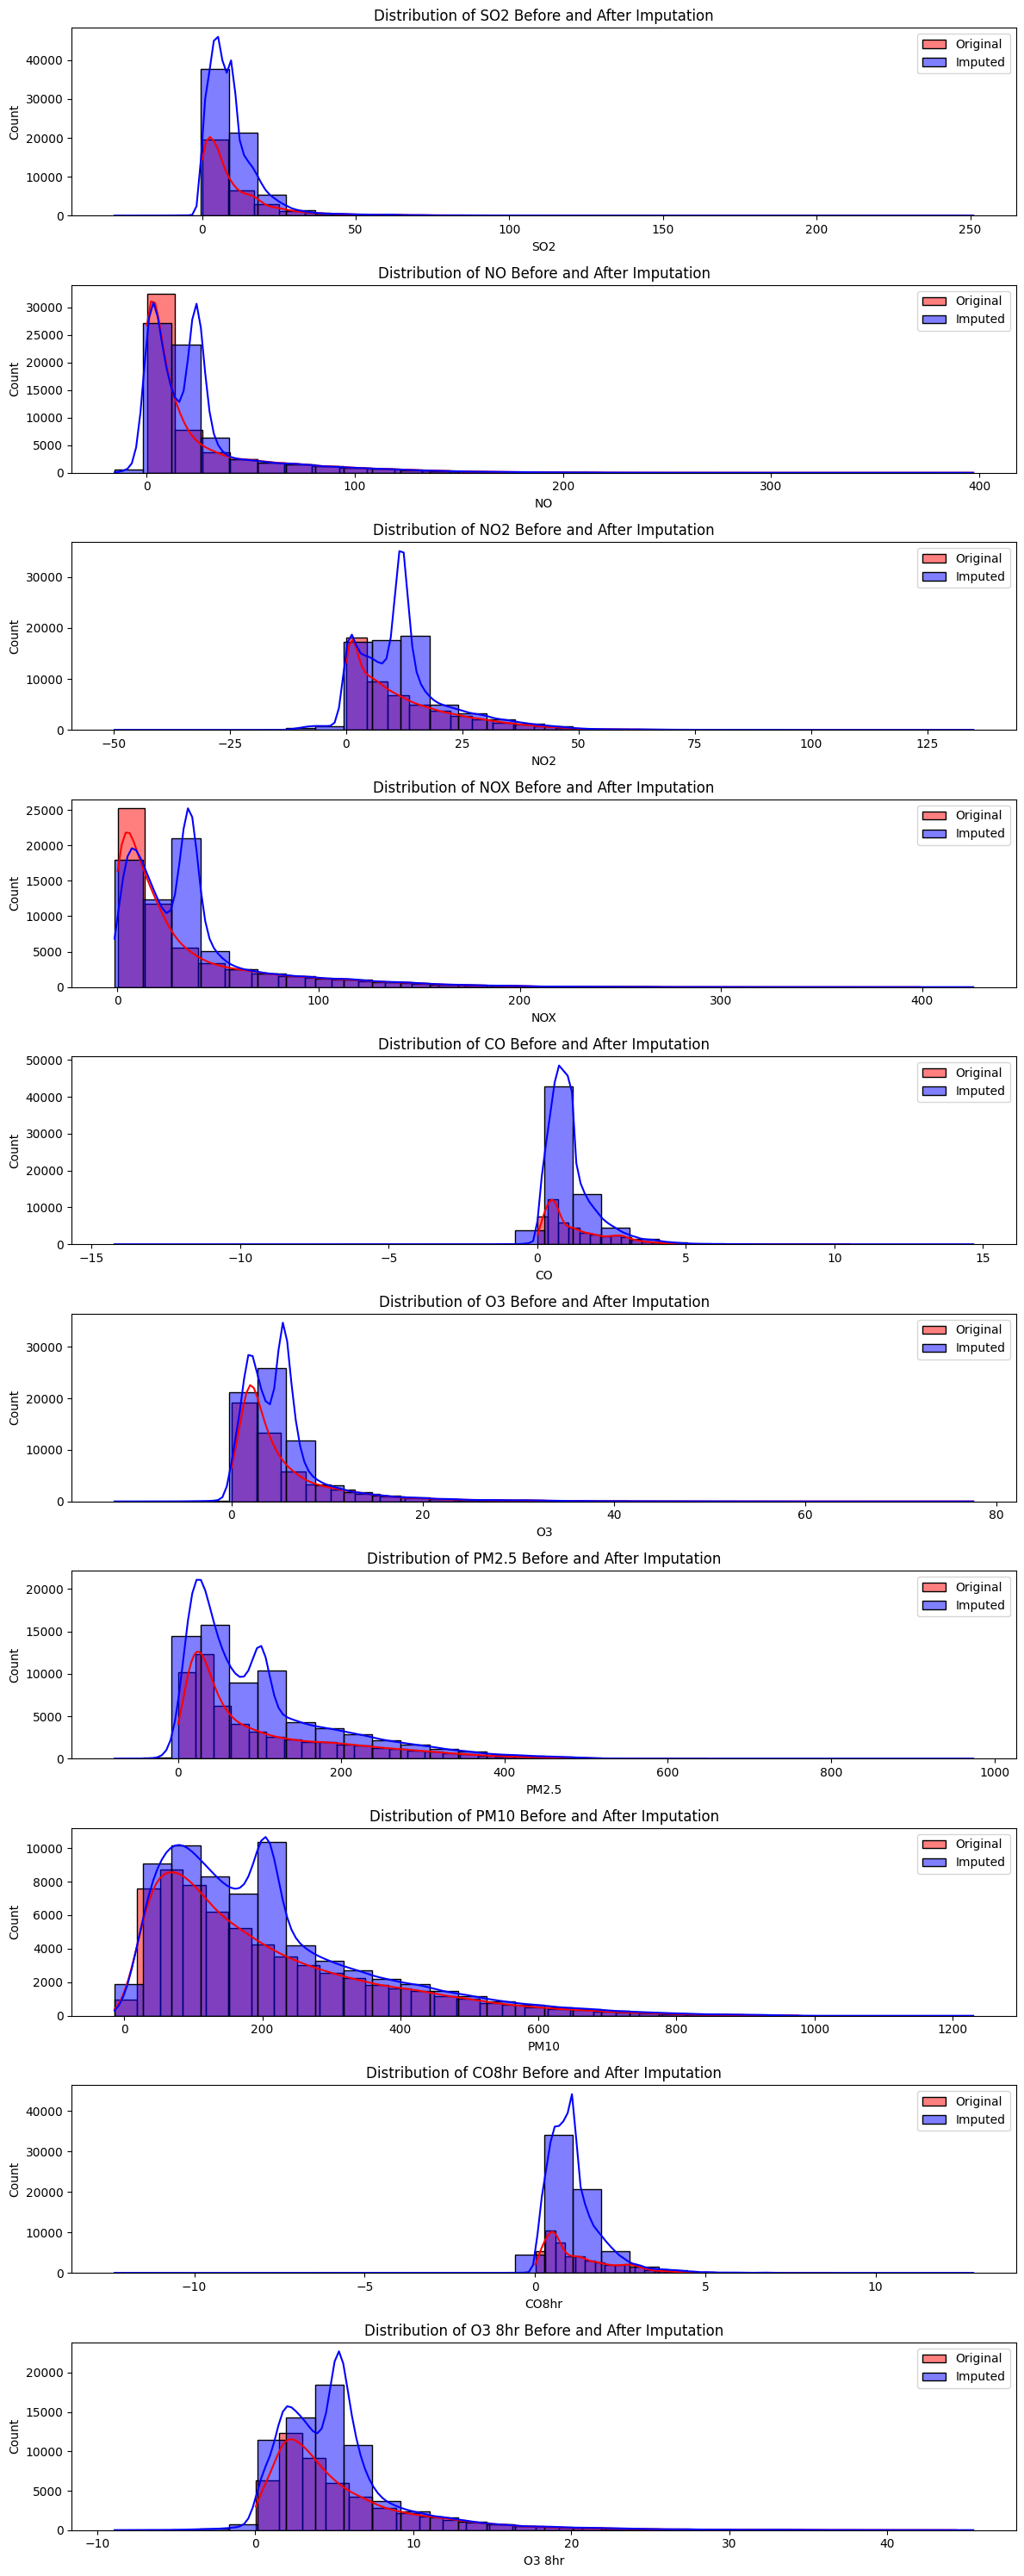

In [50]:
# Before imputation (reload the original dataset for comparison)
original_data = pd.read_csv(file_path)
for column in columns_to_convert:
    original_data[column] = pd.to_numeric(original_data[column], errors='coerce')

# Visualize the distribution before and after imputation
fig, axes = plt.subplots(len(columns_to_convert), 1, figsize=(12, 30))

for i, column in enumerate(columns_to_convert):
    sns.histplot(original_data[column], kde=True, color='red', label='Original', ax=axes[i], bins=30)
    sns.histplot(data[column], kde=True, color='blue', label='Imputed', ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {column} Before and After Imputation')
    axes[i].legend()

plt.tight_layout()
plt.show()


<ipython-input-51-922d2bf92f2c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = pd.to_numeric(data[column], errors='coerce')
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


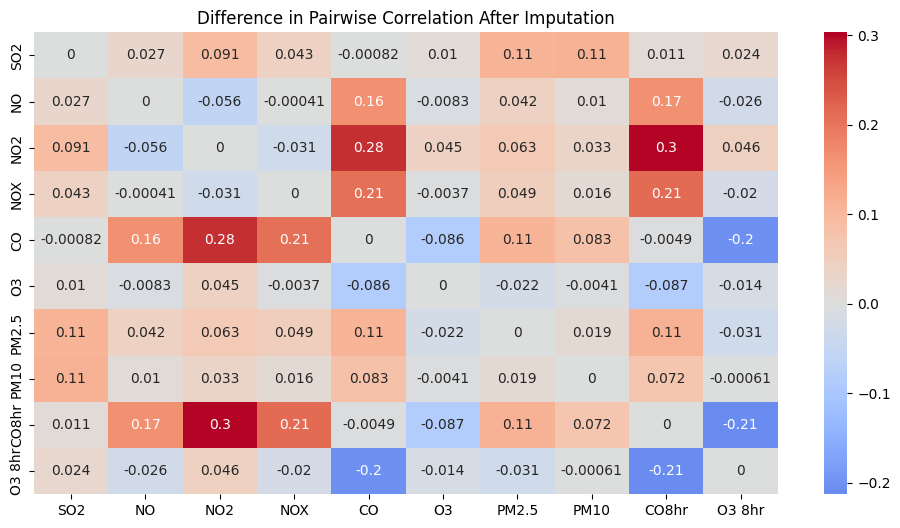

In [51]:
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality.csv'
data = pd.read_csv(file_path, low_memory=False)

import pandas as pd
from fancyimpute import IterativeImputer



# Drop rows where 'Date' or 'Time' is missing
data = data.dropna(subset=['Date', 'Time'])

# Convert relevant columns to numeric, handle errors by setting them as NaN
columns_to_convert = ['SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM2.5', 'PM10', 'CO8hr', 'O3 8hr']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Use Iterative Imputer (MICE method) for numeric columns
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
data[columns_to_convert] = iterative_imputer.fit_transform(data[columns_to_convert])

# Calculate correlation matrices
# Select only numeric columns for correlation analysis
numeric_columns = columns_to_convert  # Only use the columns we converted to numeric

# Correlation matrix before imputation (only for numeric columns)
original_correlation_matrix = original_data[numeric_columns].corr()

# Correlation matrix after imputation (only for numeric columns)
imputed_correlation_matrix = data[numeric_columns].corr()

# Visualize the difference in correlation matrices
difference_correlation_matrix = imputed_correlation_matrix - original_correlation_matrix

plt.figure(figsize=(12, 6))
sns.heatmap(difference_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Difference in Pairwise Correlation After Imputation')
plt.show()



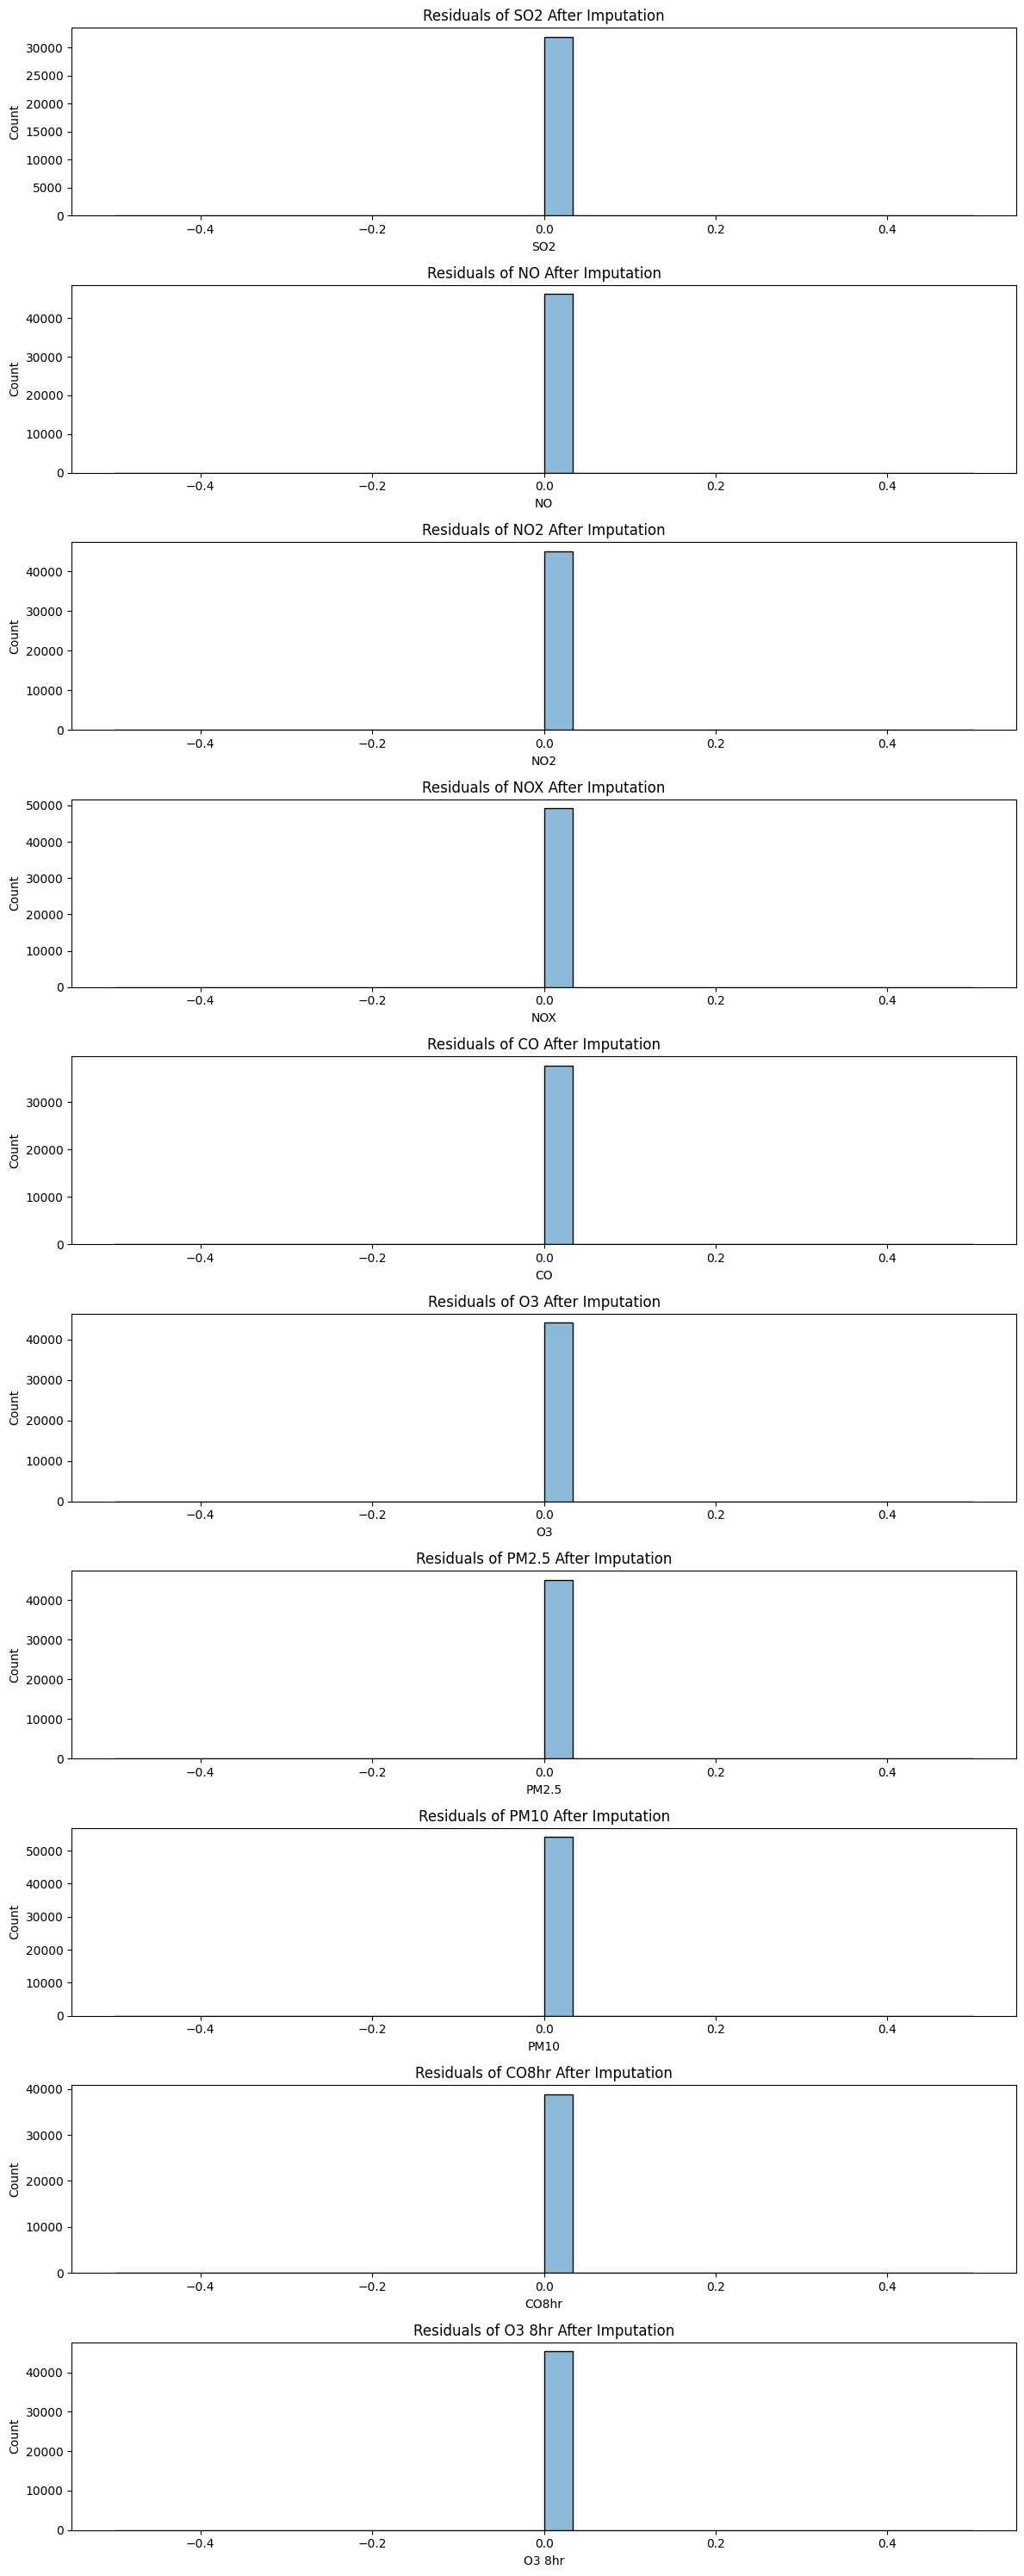

In [52]:
# Calculate residuals for imputed values (only for non-missing original values)
residuals = original_data[columns_to_convert] - data[columns_to_convert]

# Visualize residuals
fig, axes = plt.subplots(len(columns_to_convert), 1, figsize=(12, 30))

for i, column in enumerate(columns_to_convert):
    sns.histplot(residuals[column].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Residuals of {column} After Imputation')

plt.tight_layout()
plt.show()


Index(['Date', 'Time', 'SO2', 'NO', 'NO2', 'NOX', 'CO', 'CO8hr', 'O3',
       'O3 8hr', 'PM2.5', 'PM10'],
      dtype='object')


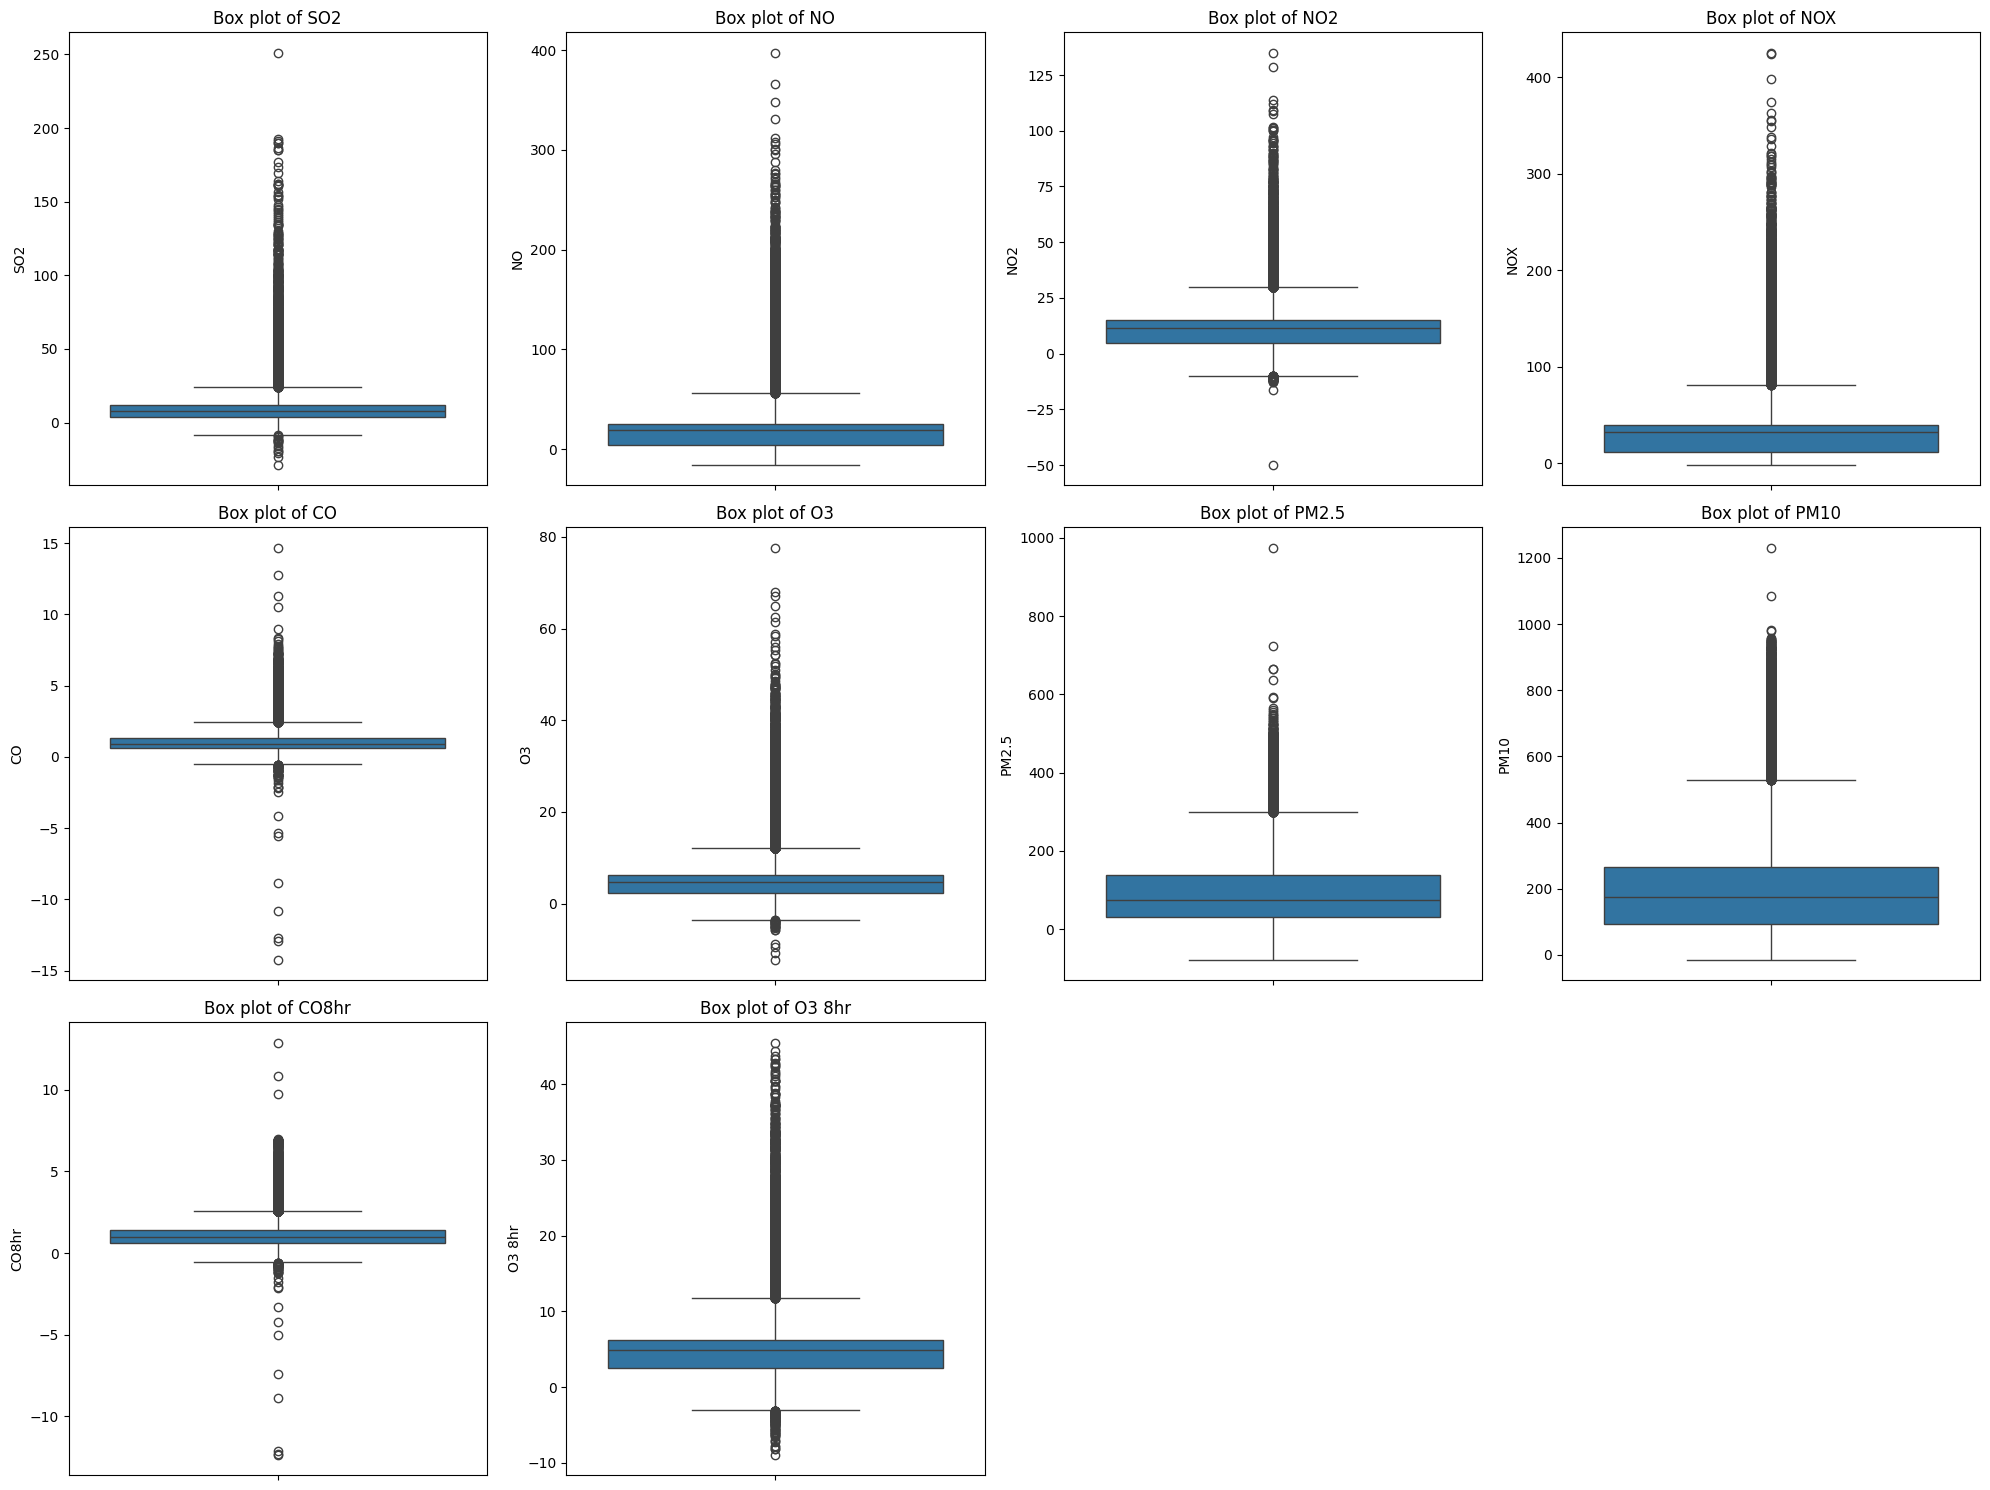

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the column names to ensure we are using the correct ones
print(data.columns)

# Plotting box plots for each numeric column to visualize outliers
numeric_columns = ['SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM2.5', 'PM10', 'CO8hr', 'O3 8hr']

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()


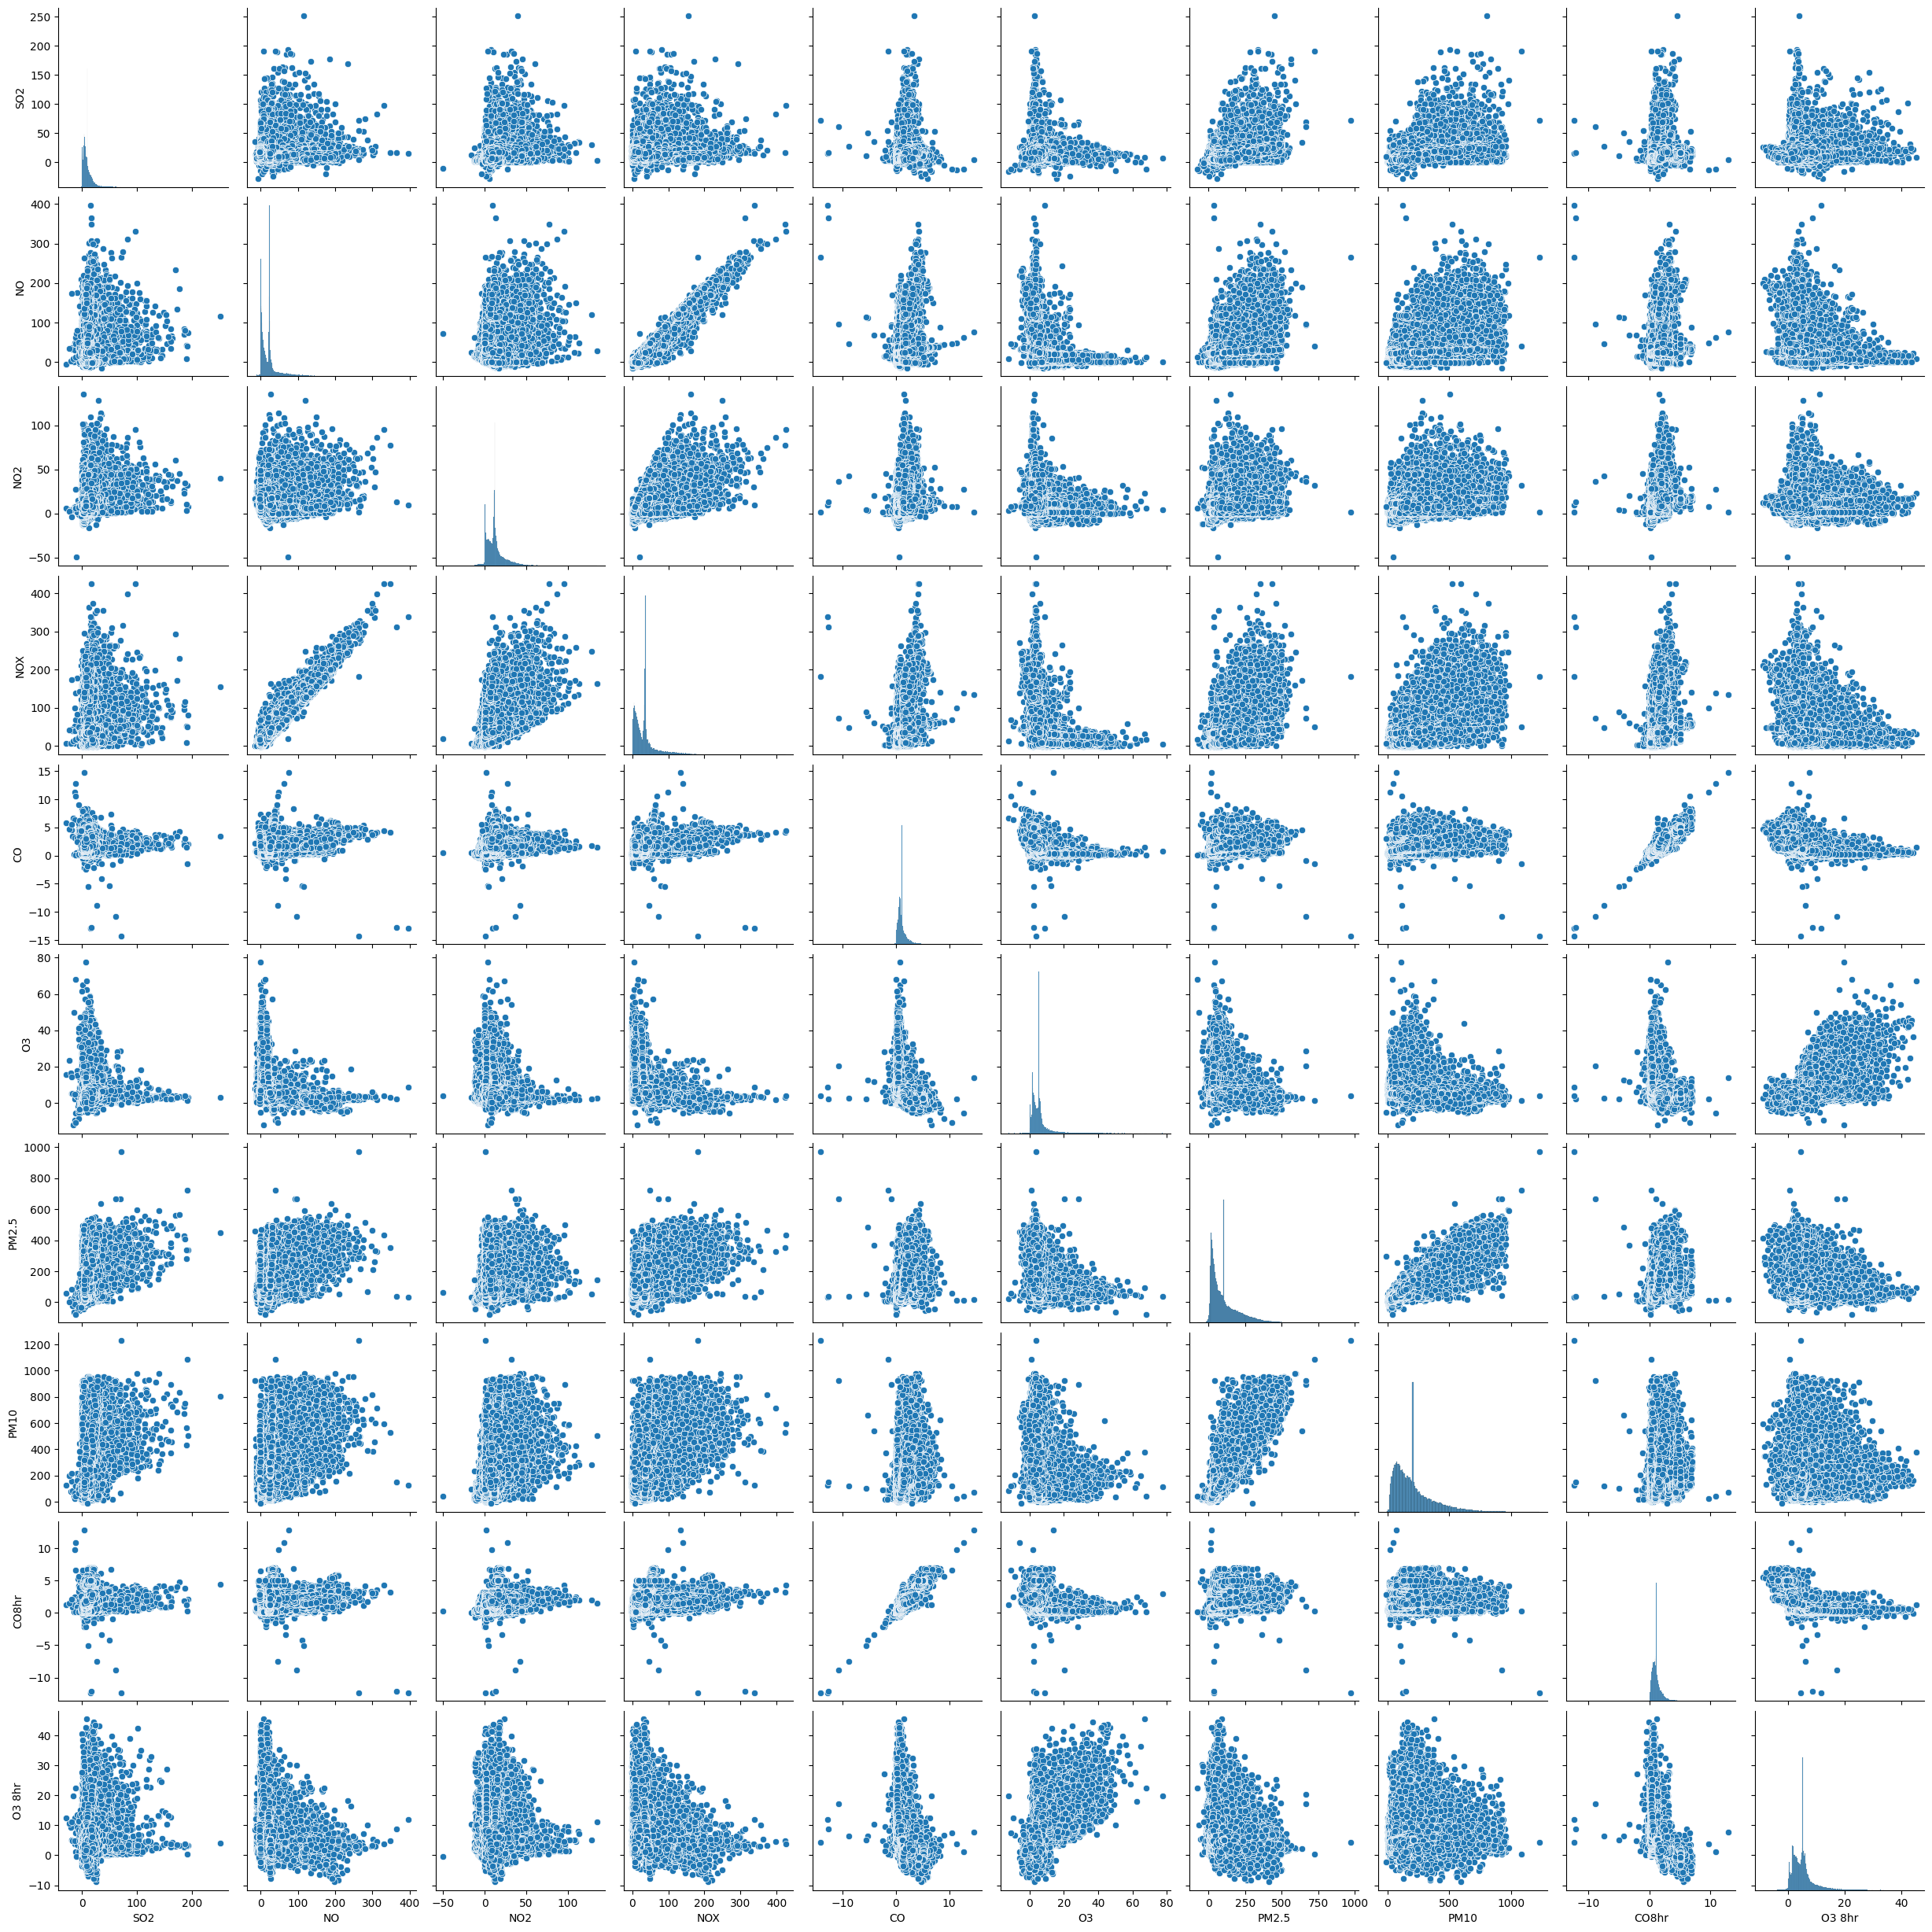

In [56]:
# Scatter plot matrix to visualize potential outliers in the context of bivariate relationships
sns.pairplot(data[numeric_columns])
plt.show()


In [63]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    return outliers

# Detect outliers using IQR method
outliers_iqr = detect_outliers_iqr(data[numeric_columns])

# Print the number of outliers detected in each column
print(outliers_iqr)


{'SO2': 3818, 'NO': 7057, 'NO2': 4836, 'NOX': 6627, 'CO': 4812, 'O3': 4905, 'PM2.5': 3422, 'PM10': 3257, 'CO8hr': 3501, 'O3 8hr': 4706}


In [64]:
from scipy.stats import zscore

# Calculate the Z-scores for the numeric columns
z_scores = data[numeric_columns].apply(zscore)

# Identify outliers as points with Z-scores greater than a threshold (e.g., 3)
outliers_z = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers detected in each column
print("Outliers detected using Z-score method:")
print(outliers_z.sum())


Outliers detected using Z-score method:
SO2       1137
NO        1742
NO2       1032
NOX       1597
CO        1308
O3        1580
PM2.5     1059
PM10      1093
CO8hr     1229
O3 8hr    1479
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


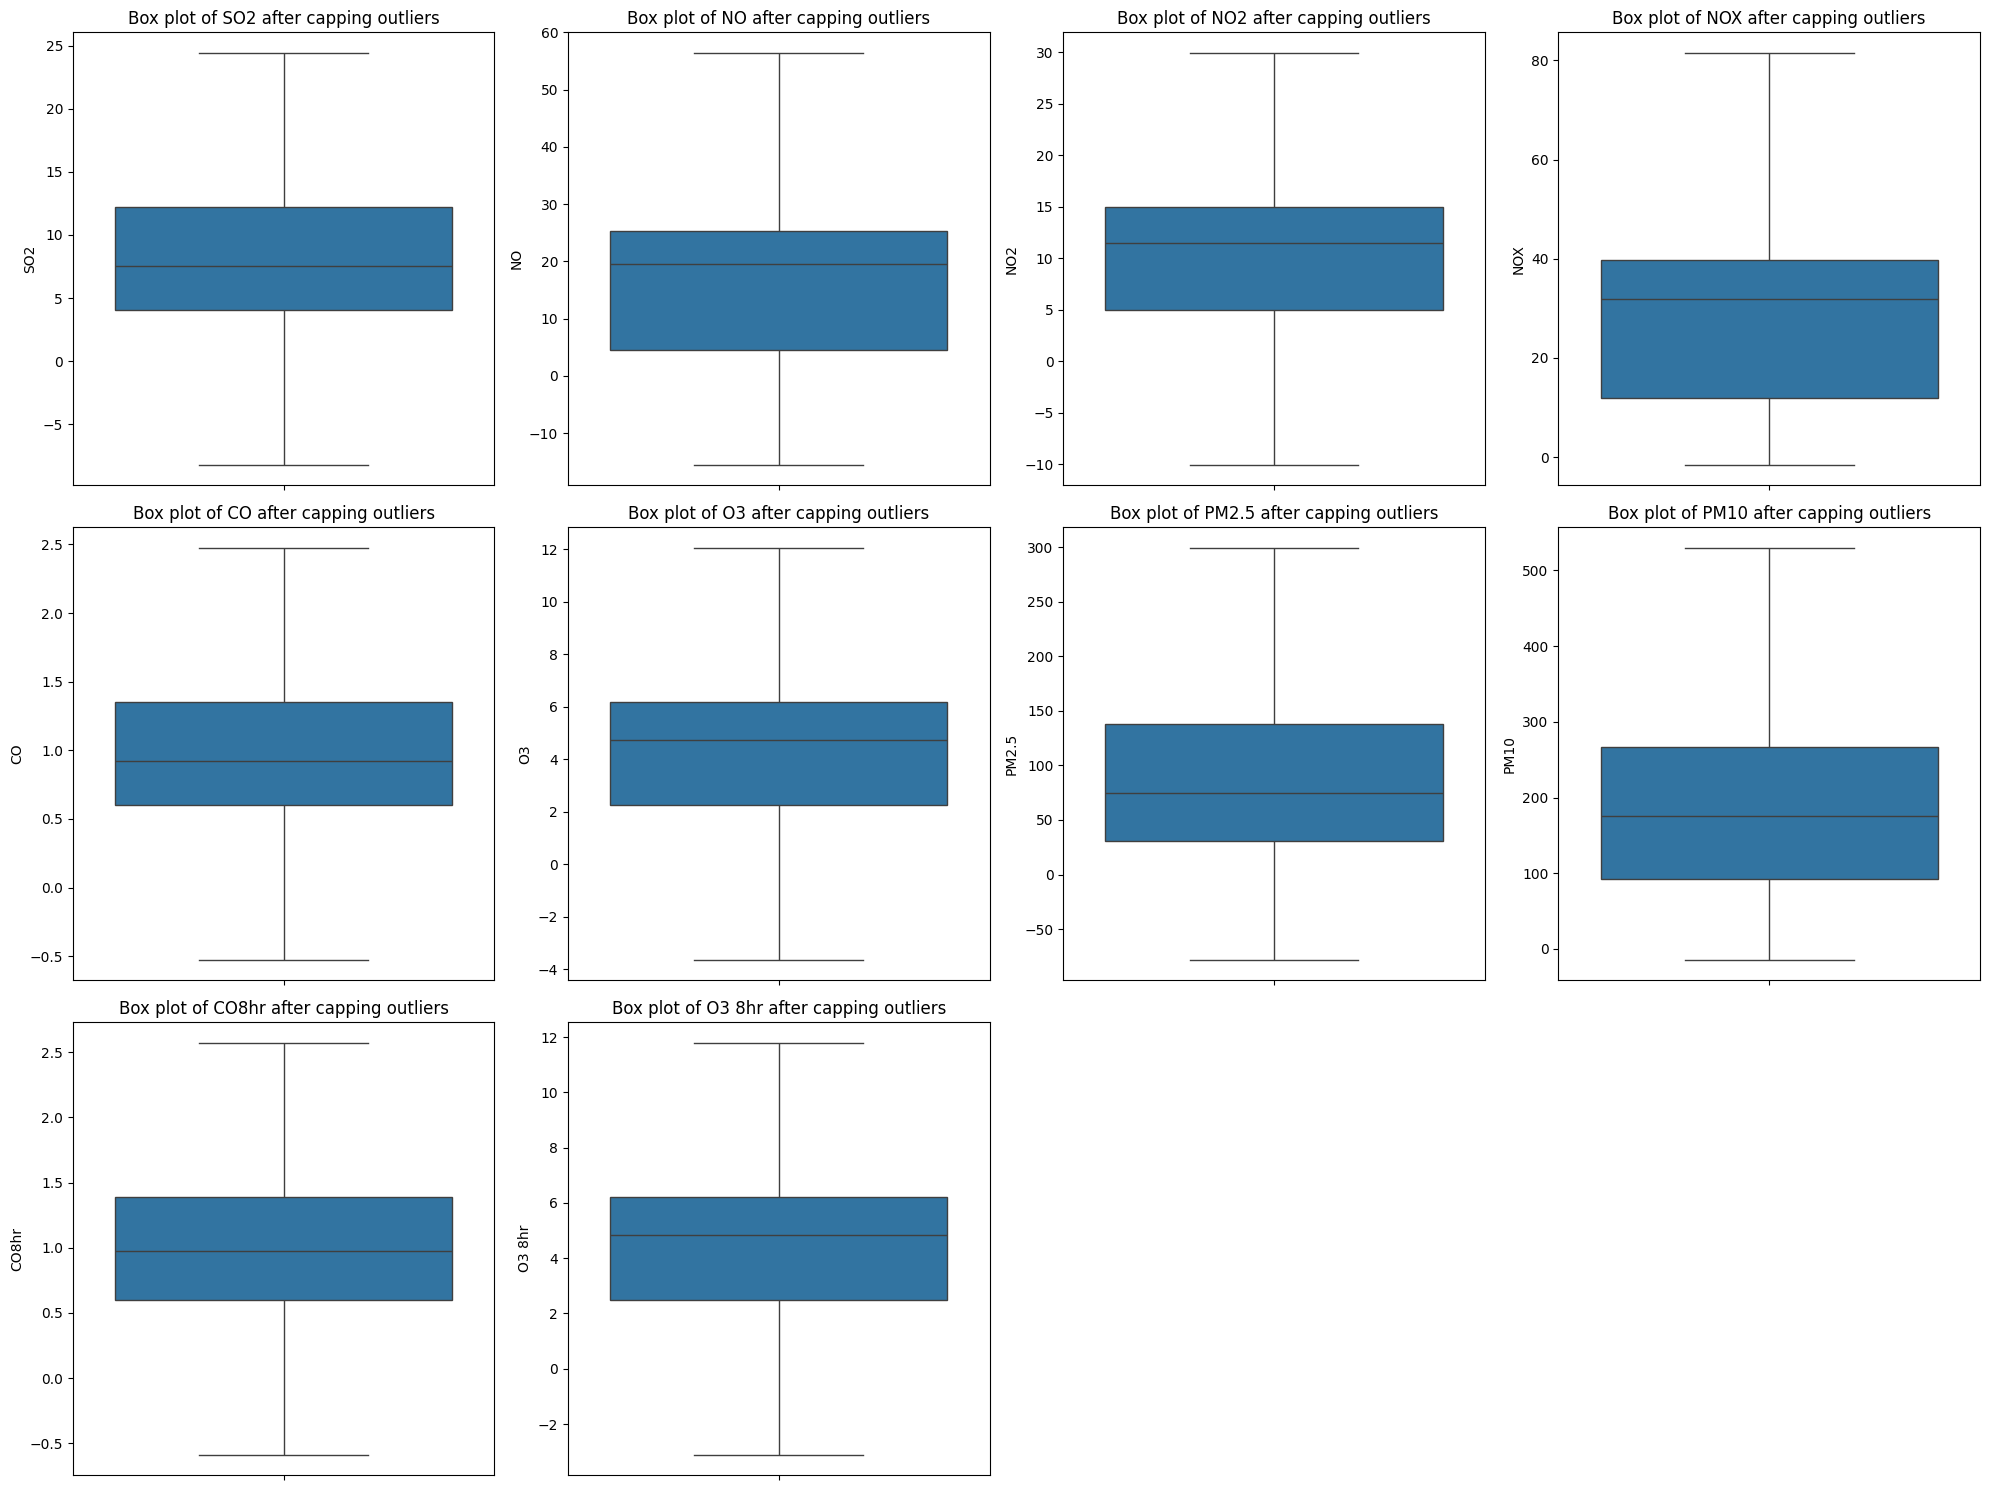

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality.csv'
data = pd.read_csv(file_path, low_memory=False)

import pandas as pd
from fancyimpute import IterativeImputer



# Drop rows where 'Date' or 'Time' is missing
data = data.dropna(subset=['Date', 'Time'])

# Convert relevant columns to numeric, handle errors by setting them as NaN
columns_to_convert = ['SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM2.5', 'PM10', 'CO8hr', 'O3 8hr']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Use Iterative Imputer (MICE method) for numeric columns
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
data[columns_to_convert] = iterative_imputer.fit_transform(data[columns_to_convert])


# Function to cap outliers using IQR method
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply capping to each numeric column
numeric_columns = ['SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM2.5', 'PM10', 'CO8hr', 'O3 8hr']

for column in numeric_columns:
    cap_outliers(data, column)


# Visualize box plots after capping outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Updated to 3 rows and 4 columns to fit 10 plots
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column} after capping outliers')
plt.tight_layout()
plt.show()


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality.csv'
data = pd.read_csv(file_path, low_memory=False)

# Drop rows where 'Date' or 'Time' is missing
data = data.dropna(subset=['Date', 'Time'])

# Convert relevant columns to numeric, handle errors by setting them as NaN
columns_to_convert = ['SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM2.5', 'PM10', 'CO8hr', 'O3 8hr']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Use Iterative Imputer (MICE method) for numeric columns
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
data[columns_to_convert] = iterative_imputer.fit_transform(data[columns_to_convert])

# Function to cap outliers using IQR method
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply capping to each numeric column
numeric_columns = ['SO2', 'NO', 'NO2', 'NOX', 'CO', 'O3', 'PM2.5', 'PM10', 'CO8hr', 'O3 8hr']

for column in numeric_columns:
    cap_outliers(data, column)

# Save the cleaned, imputed, and capped dataset to a new CSV file
output_file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality_cleaned.csv'
data.to_csv(output_file_path, index=False)

# Check the results
print(data.head())
print(data.isnull().sum())


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


        Date  Time   SO2     NO       NO2    NOX    CO     CO8hr    O3  \
1  11/1/2012  1:00  5.05  28.12  0.030000  22.12  0.88  0.760599  0.18   
2  11/1/2012  2:00  6.23  32.70  0.040000  26.84  0.86  0.745148  0.21   
3  11/1/2012  3:00  6.30  37.50 -4.819841  31.43  0.83  0.847697  0.19   
4  11/1/2012  4:00  6.32  43.44  0.040000  37.55  0.81  0.691903  0.23   
5  11/1/2012  5:00  6.00  43.33  0.030000  36.56  0.79  0.698684  0.12   

     O3 8hr   PM2.5    PM10  
1  1.976776   68.32   84.27  
2  1.959375   79.02  100.74  
3  0.610733  110.64  133.44  
4  1.814087   97.79  125.52  
5  1.549301  120.86  142.32  
Date      0
Time      0
SO2       0
NO        0
NO2       0
NOX       0
CO        0
CO8hr     0
O3        0
O3 8hr    0
PM2.5     0
PM10      0
dtype: int64


In [98]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality_cleaned.csv'
data = pd.read_csv(file_path, low_memory=False)

# Print initial dataset to verify its structure
print("Initial dataset\n", data.head())

# Convert all columns except 'Date' and 'Time' to numeric and handle errors by setting them as NaN
columns_to_convert = data.columns.difference(['Date', 'Time'])
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Print data after conversion to numeric
print("Step 1: Data after converting to numeric and before dropping NaNs\n", data.head())

# Drop rows where any column contains NaN values, excluding 'Date' and 'Time' columns
data = data.dropna(subset=columns_to_convert)
print("Step 2: Data after dropping rows with NaNs\n", data.head())

# Combine 'Date' and 'Time' into a single 'Date_Time' column and handle '24:00' case
data['Date_Time'] = data['Date'].astype(str) + ' ' + data['Time'].astype(str)
data['Date_Time'] = data['Date_Time'].str.replace(' 24:00', ' 00:00')

# Convert 'Date_Time' to datetime
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d/%m/%Y %H:%M', errors='coerce')
print("Step 3: Data after combining and converting 'Date' and 'Time' to 'Date_Time'\n", data.head())

# Drop rows where 'Date_Time' could not be parsed
data = data.dropna(subset=['Date_Time'])
print("Step 4: Data after dropping rows where 'Date_Time' could not be parsed\n", data.head())

# Drop the original 'Date' and 'Time' columns
data = data.drop(columns=['Date', 'Time'])

# Calculate daily average values for each pollutant
daily_avg = data.groupby(data['Date_Time'].dt.date).mean()
print("Step 5: Daily averages\n", daily_avg.head())


# Rename the index column to 'Date_Time'
daily_avg.rename(columns={'index': 'Date_Time'}, inplace=True)

# Drop the year 2012 as per the original code
daily_avg['Date_Time'] = pd.to_datetime(daily_avg['Date_Time'])
daily_avg = daily_avg[daily_avg['Date_Time'].dt.year != 2012]
print("Step 6: Daily averages after dropping year 2012\n", daily_avg.head())

# Define sub-index calculation functions
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 748) * 100 / 539
    else:
        return 0

# Calculate sub-indices for each pollutant
daily_avg["PM2.5_subindex"] = daily_avg["PM2.5"].apply(get_PM25_subindex)
daily_avg["PM10_subindex"] = daily_avg["PM10"].apply(get_PM10_subindex)
daily_avg["SO2_subindex"] = daily_avg["SO2"].apply(get_SO2_subindex)
daily_avg["NOx_subindex"] = daily_avg["NOX"].apply(get_NOx_subindex)
daily_avg["CO_subindex"] = daily_avg["CO"].apply(get_CO_subindex)
daily_avg["O3_subindex"] = daily_avg["O3"].apply(get_O3_subindex)

# Calculate AQI
daily_avg["AQI_calculated"] = daily_avg[["PM2.5_subindex", "PM10_subindex", "SO2_subindex", "NOx_subindex", "CO_subindex", "O3_subindex"]].max(axis=1)

# Define AQI bucketing function
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

# Apply AQI bucket function
daily_avg["AQI_bucket_calculated"] = daily_avg["AQI_calculated"].apply(get_AQI_bucket)

# Display the resulting DataFrame
print("Final Daily Averages DataFrame\n", daily_avg.head())




Initial dataset
         Date  Time   SO2     NO       NO2    NOX    CO     CO8hr    O3  \
0  11/1/2012  1:00  5.05  28.12  0.030000  22.12  0.88  0.760599  0.18   
1  11/1/2012  2:00  6.23  32.70  0.040000  26.84  0.86  0.745148  0.21   
2  11/1/2012  3:00  6.30  37.50 -4.819841  31.43  0.83  0.847697  0.19   
3  11/1/2012  4:00  6.32  43.44  0.040000  37.55  0.81  0.691903  0.23   
4  11/1/2012  5:00  6.00  43.33  0.030000  36.56  0.79  0.698684  0.12   

     O3 8hr   PM2.5    PM10  
0  1.976776   68.32   84.27  
1  1.959375   79.02  100.74  
2  0.610733  110.64  133.44  
3  1.814087   97.79  125.52  
4  1.549301  120.86  142.32  
Step 1: Data after converting to numeric and before dropping NaNs
         Date  Time   SO2     NO       NO2    NOX    CO     CO8hr    O3  \
0  11/1/2012  1:00  5.05  28.12  0.030000  22.12  0.88  0.760599  0.18   
1  11/1/2012  2:00  6.23  32.70  0.040000  26.84  0.86  0.745148  0.21   
2  11/1/2012  3:00  6.30  37.50 -4.819841  31.43  0.83  0.847697  0.1

In [100]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality_cleaned.csv'
data = pd.read_csv(file_path, low_memory=False)

# Print initial dataset to verify its structure
print("Initial dataset\n", data.head())

# Convert all columns except 'Date' and 'Time' to numeric and handle errors by setting them as NaN
columns_to_convert = data.columns.difference(['Date', 'Time'])
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Print data after conversion to numeric
print("Step 1: Data after converting to numeric and before dropping NaNs\n", data.head())

# Drop rows where any column contains NaN values, excluding 'Date' and 'Time' columns
data = data.dropna(subset=columns_to_convert)
print("Step 2: Data after dropping rows with NaNs\n", data.head())

# Combine 'Date' and 'Time' into a single 'Date_Time' column and handle '24:00' case
data['Date_Time'] = data['Date'].astype(str) + ' ' + data['Time'].astype(str)
data['Date_Time'] = data['Date_Time'].str.replace(' 24:00', ' 00:00')

# Convert 'Date_Time' to datetime
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d/%m/%Y %H:%M', errors='coerce')
print("Step 3: Data after combining and converting 'Date' and 'Time' to 'Date_Time'\n", data.head())

# Drop rows where 'Date_Time' could not be parsed
data = data.dropna(subset=['Date_Time'])
print("Step 4: Data after dropping rows where 'Date_Time' could not be parsed\n", data.head())

# Drop the original 'Date' and 'Time' columns
data = data.drop(columns=['Date', 'Time'])

# Calculate daily average values for each pollutant
daily_avg = data.groupby(data['Date_Time'].dt.date).mean()
print("Step 5: Daily averages\n", daily_avg.head())


# Rename the index column to 'Date_Time'
daily_avg.rename(columns={'index': 'Date_Time'}, inplace=True)

# Drop the year 2012 as per the original code
daily_avg['Date_Time'] = pd.to_datetime(daily_avg['Date_Time'])
daily_avg = daily_avg[daily_avg['Date_Time'].dt.year != 2012]
print("Step 6: Daily averages after dropping year 2012\n", daily_avg.head())

# Define sub-index calculation functions
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 748) * 100 / 539
    else:
        return 0

# Calculate sub-indices for each pollutant
daily_avg["PM2.5_subindex"] = daily_avg["PM2.5"].apply(get_PM25_subindex)
daily_avg["PM10_subindex"] = daily_avg["PM10"].apply(get_PM10_subindex)
daily_avg["SO2_subindex"] = daily_avg["SO2"].apply(get_SO2_subindex)
daily_avg["NOx_subindex"] = daily_avg["NOX"].apply(get_NOx_subindex)
daily_avg["CO_subindex"] = daily_avg["CO"].apply(get_CO_subindex)
daily_avg["O3_subindex"] = daily_avg["O3"].apply(get_O3_subindex)

# Calculate AQI
daily_avg["AQI_calculated"] = daily_avg[["PM2.5_subindex", "PM10_subindex", "SO2_subindex", "NOx_subindex", "CO_subindex", "O3_subindex"]].max(axis=1)

# Define AQI bucketing function
def get_AQI_bucket(x):
    if x <= 50:
        return "0"
    elif x <= 100:
        return "1"
    elif x <= 200:
        return "2"
    elif x <= 300:
        return "3"
    elif x <= 400:
        return "4"
    elif x > 400:
        return "5"
    else:
        return np.NaN

# Apply AQI bucket function
daily_avg["AQI_bucket_calculated"] = daily_avg["AQI_calculated"].apply(get_AQI_bucket)

# Display the resulting DataFrame
print("Final Daily Averages DataFrame\n", daily_avg.head())




Initial dataset
         Date  Time   SO2     NO       NO2    NOX    CO     CO8hr    O3  \
0  11/1/2012  1:00  5.05  28.12  0.030000  22.12  0.88  0.760599  0.18   
1  11/1/2012  2:00  6.23  32.70  0.040000  26.84  0.86  0.745148  0.21   
2  11/1/2012  3:00  6.30  37.50 -4.819841  31.43  0.83  0.847697  0.19   
3  11/1/2012  4:00  6.32  43.44  0.040000  37.55  0.81  0.691903  0.23   
4  11/1/2012  5:00  6.00  43.33  0.030000  36.56  0.79  0.698684  0.12   

     O3 8hr   PM2.5    PM10  
0  1.976776   68.32   84.27  
1  1.959375   79.02  100.74  
2  0.610733  110.64  133.44  
3  1.814087   97.79  125.52  
4  1.549301  120.86  142.32  
Step 1: Data after converting to numeric and before dropping NaNs
         Date  Time   SO2     NO       NO2    NOX    CO     CO8hr    O3  \
0  11/1/2012  1:00  5.05  28.12  0.030000  22.12  0.88  0.760599  0.18   
1  11/1/2012  2:00  6.23  32.70  0.040000  26.84  0.86  0.745148  0.21   
2  11/1/2012  3:00  6.30  37.50 -4.819841  31.43  0.83  0.847697  0.1

In [101]:
# Display the resulting DataFrame
print("Final Daily Averages DataFrame\n", daily_avg.head())


Final Daily Averages DataFrame
                   SO2         NO        NO2        NOX        CO     CO8hr  \
Date_Time                                                                    
2013-01-01  12.218913  41.944698   3.096300  58.774518  1.998638  1.947085   
2013-01-02  24.415000  45.705217  16.249022  66.546247  1.957609  2.067851   
2013-01-03  17.917826  24.054348   7.594325  31.134340  0.783043  0.846051   
2013-01-04   6.941264  16.737784  -1.028671  13.421413  0.177971  0.199428   
2013-01-05   9.492281  24.881368  -0.597161  23.156246  0.366504  0.359581   

                  O3    O3 8hr       PM2.5        PM10           Date_Time  \
Date_Time                                                                    
2013-01-01  3.287012  2.613383  213.737845  351.063615 2013-01-01 12:00:00   
2013-01-02  4.861896  4.950531  270.449245  434.306522 2013-01-02 12:00:00   
2013-01-03  6.890233  8.299199  140.907776  294.971304 2013-01-03 12:00:00   
2013-01-04  5.361295  4.667376 

In [102]:
daily_avg

SO2         NO        NO2        NOX        CO     CO8hr  \
Date_Time                                                                    
2013-01-01  12.218913  41.944698   3.096300  58.774518  1.998638  1.947085   
2013-01-02  24.415000  45.705217  16.249022  66.546247  1.957609  2.067851   
2013-01-03  17.917826  24.054348   7.594325  31.134340  0.783043  0.846051   
2013-01-04   6.941264  16.737784  -1.028671  13.421413  0.177971  0.199428   
2013-01-05   9.492281  24.881368  -0.597161  23.156246  0.366504  0.359581   
...               ...        ...        ...        ...       ...       ...   
2019-08-01  19.496957  30.430870  27.846087  58.605374  1.695652  1.818533   
2019-09-01  12.504783  29.530971  27.429728  58.047401  1.524348  1.463804   
2019-10-01   3.202174  33.472911  23.147283  55.857839  1.836739  1.918913   
2019-11-01   3.564348  40.619130  24.878098  64.048130  2.074783  2.205652   
2019-12-01   2.559130  41.868696  22.083750  64.094070  2.017174  2.054891   

                  O3    O3 8hr       PM2.5        PM10           Date_Time  \
Date_Time                                                                    
2013-01-01  3.287012  2.613383  213.737845  351.063615 2013-01-01 12:00:00   
2013-01-02  4.861896  4.950531  270.449245  434.306522 2013-01-02 12:00:00   
2013-01-03  6.890233  8.299199  140.907776  294.971304 2013-01-03 12:00:00   
2013-01-04  5.361295  4.667376   52.983981  116.229088 2013-01-04 12:00:00   
2013-01-05  6.435371  7.623808   46.888797  117.832158 2013-01-05 12:00:00   
...              ...       ...         ...         ...                 ...   
2019-08-01  3.997391  3.955761  189.745401  328.076522 2019-08-01 12:00:00   
2019-09-01  2.980000  3.080435  191.294732  346.029565 2019-09-01 12:00:00   
2019-10-01  3.808261  3.703696  225.766707  399.580534 2019-10-01 12:00:00   
2019-11-01  3.415177  3.567554  239.912103  417.216328 2019-11-01 12:00:00   
2019-12-01  2.743913  2.691467  229.958728  401.061598 2019-12-01 12:00:00   

            PM2.5_subindex  PM10_subindex  SO2_subindex  NOx_subindex  \
Date_Time                                                               
2013-01-01      372.106035     301.329519     15.273641     73.468148   
2013-01-02      415.730189     405.383152     30.518750     83.182809   
2013-01-03      316.082904     244.971304     22.397283     38.917925   
2013-01-04       88.306635     110.819392      8.676581     16.776766   
2013-01-05       78.147995     111.888106     11.865352     28.945307   
...                    ...            ...           ...           ...   
2019-08-01      353.650308     278.076522     24.371196     73.256718   
2019-09-01      354.842102     296.029565     15.630978     72.559251   
2019-10-01      381.359006     361.975668      4.002717     69.822299   
2019-11-01      392.240079     384.020410      4.455435     80.060163   
2019-12-01      384.583637     363.826998      3.198913     80.117588   

            CO_subindex  O3_subindex  AQI_calculated AQI_bucket_calculated  
Date_Time                                                                   
2013-01-01    99.931923     3.287012      372.106035                     4  
2013-01-02    97.880435     4.861896      415.730189                     5  
2013-01-03    39.152174     6.890233      316.082904                     4  
2013-01-04     8.898572     5.361295      110.819392                     2  
2013-01-05    18.325223     6.435371      111.888106                     2  
...                 ...          ...             ...                   ...  
2019-08-01    84.782609     3.997391      353.650308                     4  
2019-09-01    76.217391     2.980000      354.842102                     4  
2019-10-01    91.836957     3.808261      381.359006                     4  
2019-11-01   100.934783     3.415177      392.240079                     4  
2019-12-01   100.214674     2.743913      384.583637                     4  

[1105 rows x 19 columns]

In [104]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality_cleaned.csv'
data = pd.read_csv(file_path, low_memory=False)

# Print initial dataset to verify its structure
print("Initial dataset\n", data.head())

# Convert all columns except 'Date' and 'Time' to numeric and handle errors by setting them as NaN
columns_to_convert = data.columns.difference(['Date', 'Time'])
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Print data after conversion to numeric
print("Step 1: Data after converting to numeric and before dropping NaNs\n", data.head())

# Drop rows where any column contains NaN values, excluding 'Date' and 'Time' columns
data = data.dropna(subset=columns_to_convert)
print("Step 2: Data after dropping rows with NaNs\n", data.head())

# Combine 'Date' and 'Time' into a single 'Date_Time' column and handle '24:00' case
data['Date_Time'] = data['Date'].astype(str) + ' ' + data['Time'].astype(str)
data['Date_Time'] = data['Date_Time'].str.replace(' 24:00', ' 00:00')

# Convert 'Date_Time' to datetime
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d/%m/%Y %H:%M', errors='coerce')
print("Step 3: Data after combining and converting 'Date' and 'Time' to 'Date_Time'\n", data.head())

# Drop rows where 'Date_Time' could not be parsed
data = data.dropna(subset=['Date_Time'])
print("Step 4: Data after dropping rows where 'Date_Time' could not be parsed\n", data.head())

# Drop the original 'Date' and 'Time' columns
data = data.drop(columns=['Date', 'Time'])

# Calculate daily average values for each pollutant
daily_avg = data.groupby(data['Date_Time'].dt.date).mean()
print("Step 5: Daily averages\n", daily_avg.head())

# Rename the index column to 'Date_Time'
daily_avg.rename(columns={'index': 'Date_Time'}, inplace=True)

# Drop the year 2012 as per the original code
daily_avg['Date_Time'] = pd.to_datetime(daily_avg['Date_Time'])
daily_avg = daily_avg[daily_avg['Date_Time'].dt.year != 2012]
print("Step 6: Daily averages after dropping year 2012\n", daily_avg.head())

# Define sub-index calculation functions
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 748) * 100 / 539
    else:
        return 0

# Calculate sub-indices for each pollutant
daily_avg["PM2.5_subindex"] = daily_avg["PM2.5"].apply(get_PM25_subindex)
daily_avg["PM10_subindex"] = daily_avg["PM10"].apply(get_PM10_subindex)
daily_avg["SO2_subindex"] = daily_avg["SO2"].apply(get_SO2_subindex)
daily_avg["NOx_subindex"] = daily_avg["NOX"].apply(get_NOx_subindex)
daily_avg["CO_subindex"] = daily_avg["CO"].apply(get_CO_subindex)
daily_avg["O3_subindex"] = daily_avg["O3"].apply(get_O3_subindex)

# Calculate AQI
daily_avg["AQI_calculated"] = daily_avg[["PM2.5_subindex", "PM10_subindex", "SO2_subindex", "NOx_subindex", "CO_subindex", "O3_subindex"]].max(axis=1)

# Define AQI bucketing function
def get_AQI_bucket(x):
    if x <= 50:
        return "0"
    elif x <= 100:
        return "1"
    elif x <= 200:
        return "2"
    elif x <= 300:
        return "3"
    elif x <= 400:
        return "4"
    elif x > 400:
        return "5"
    else:
        return np.NaN

# Apply AQI bucket function
daily_avg["AQI_bucket_calculated"] = daily_avg["AQI_calculated"].apply(get_AQI_bucket)

# Display the resulting DataFrame
print("Final Daily Averages DataFrame\n", daily_avg.head())

# Save the calculated AQI to a new CSV file
output_file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality_AQI.csv'
daily_avg.to_csv(output_file_path, index=False)

# Code to download the final dataset
from google.colab import files
files.download(output_file_path)


Initial dataset
         Date  Time   SO2     NO       NO2    NOX    CO     CO8hr    O3  \
0  11/1/2012  1:00  5.05  28.12  0.030000  22.12  0.88  0.760599  0.18   
1  11/1/2012  2:00  6.23  32.70  0.040000  26.84  0.86  0.745148  0.21   
2  11/1/2012  3:00  6.30  37.50 -4.819841  31.43  0.83  0.847697  0.19   
3  11/1/2012  4:00  6.32  43.44  0.040000  37.55  0.81  0.691903  0.23   
4  11/1/2012  5:00  6.00  43.33  0.030000  36.56  0.79  0.698684  0.12   

     O3 8hr   PM2.5    PM10  
0  1.976776   68.32   84.27  
1  1.959375   79.02  100.74  
2  0.610733  110.64  133.44  
3  1.814087   97.79  125.52  
4  1.549301  120.86  142.32  
Step 1: Data after converting to numeric and before dropping NaNs
         Date  Time   SO2     NO       NO2    NOX    CO     CO8hr    O3  \
0  11/1/2012  1:00  5.05  28.12  0.030000  22.12  0.88  0.760599  0.18   
1  11/1/2012  2:00  6.23  32.70  0.040000  26.84  0.86  0.745148  0.21   
2  11/1/2012  3:00  6.30  37.50 -4.819841  31.43  0.83  0.847697  0.1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

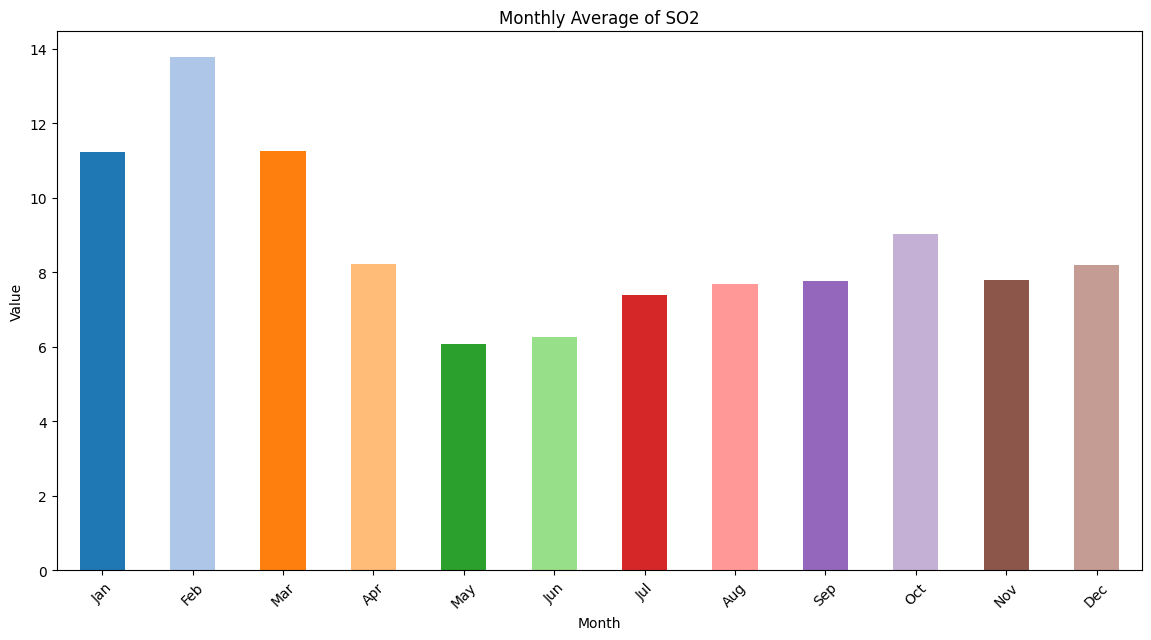

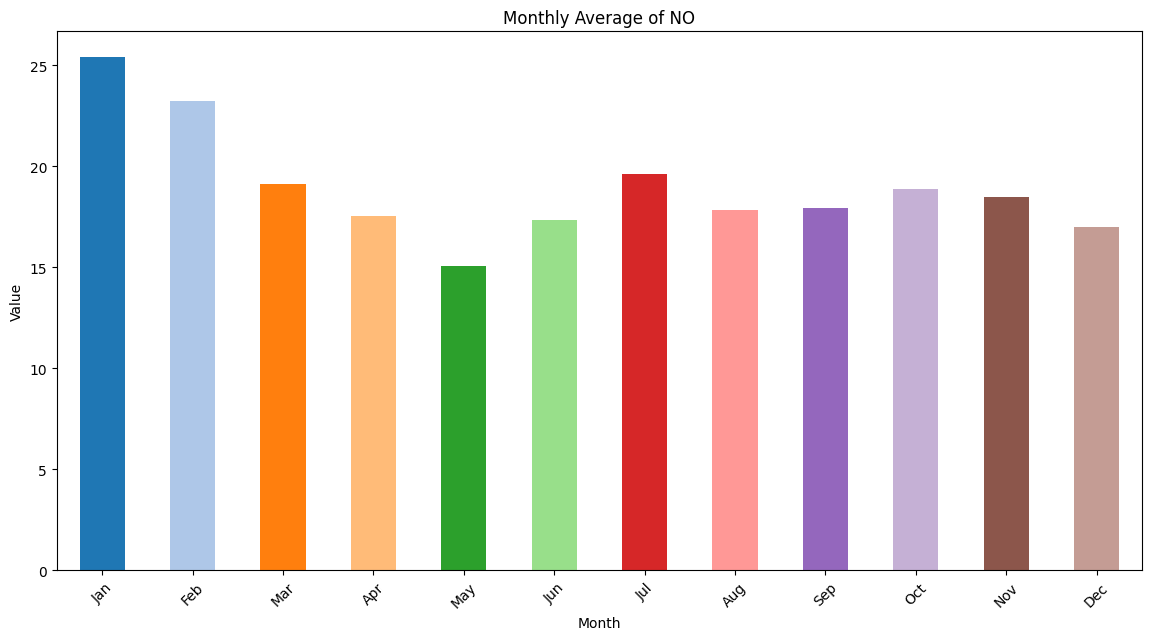

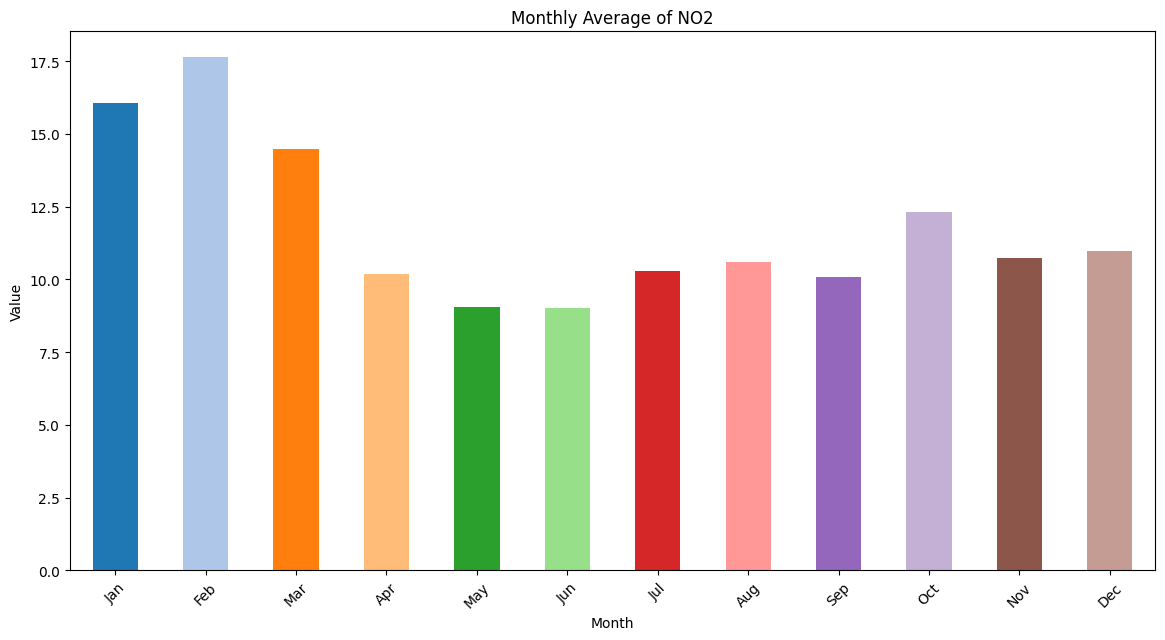

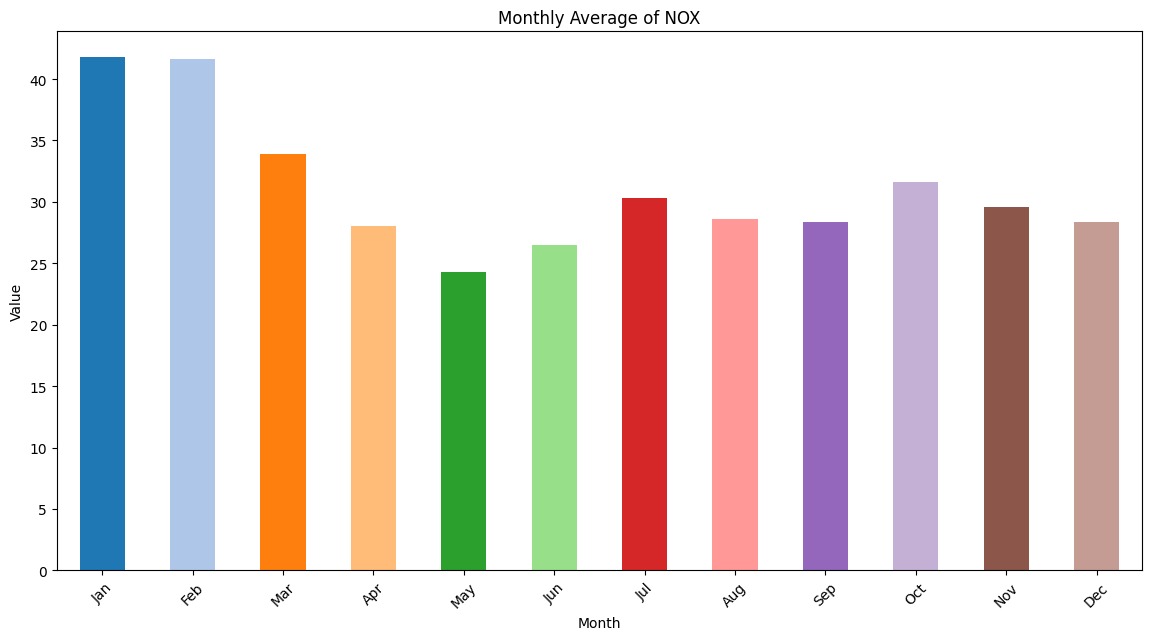

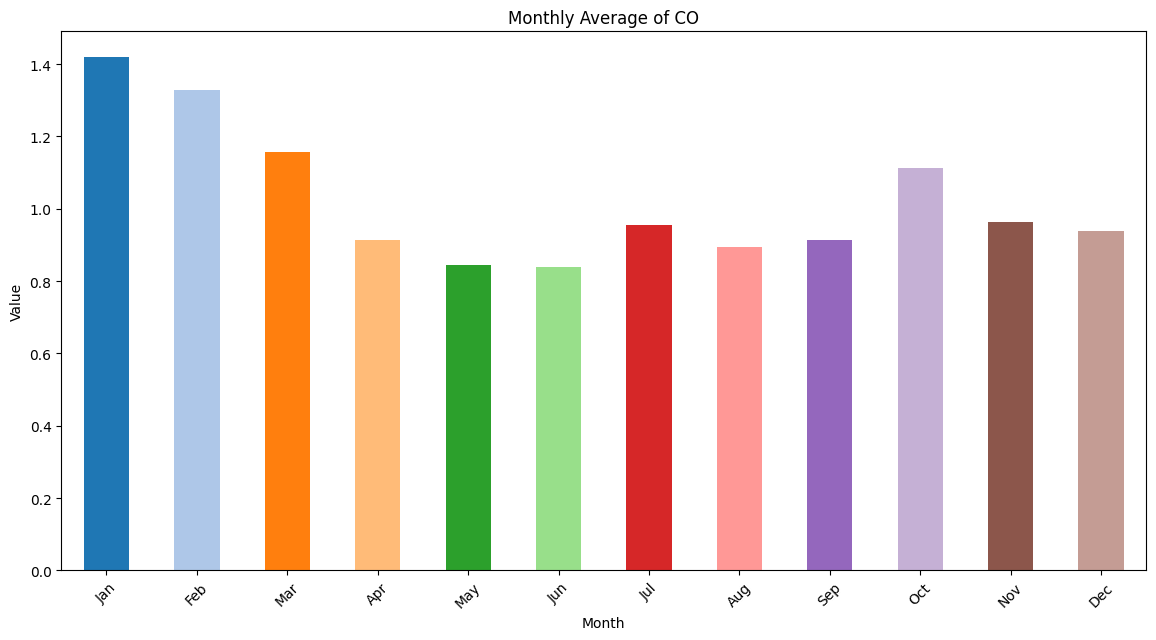

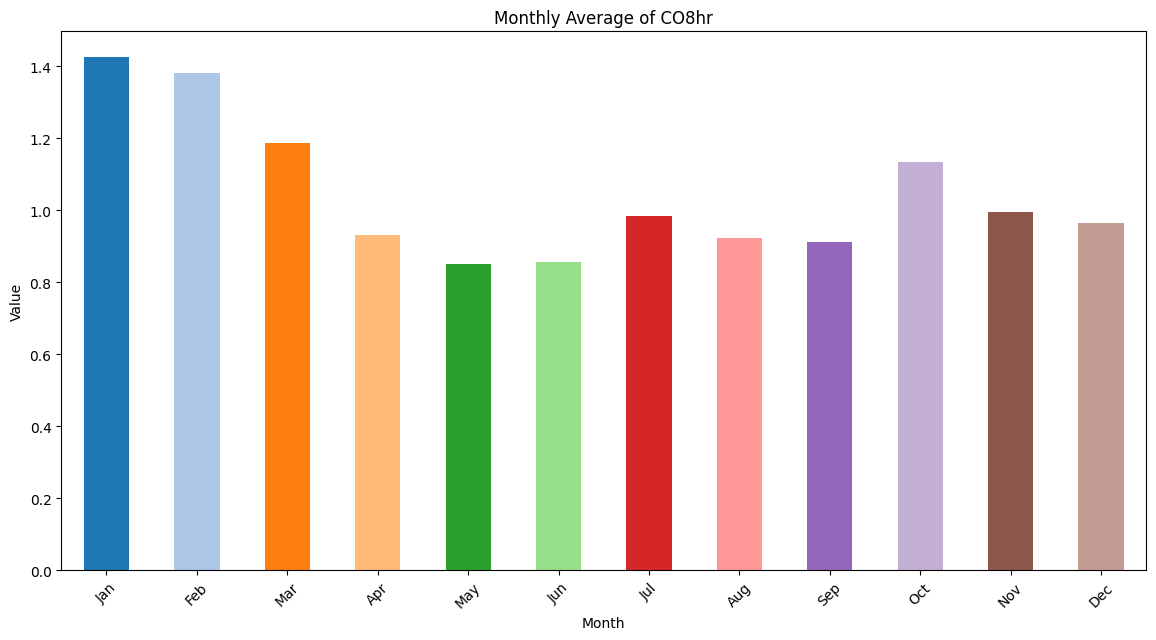

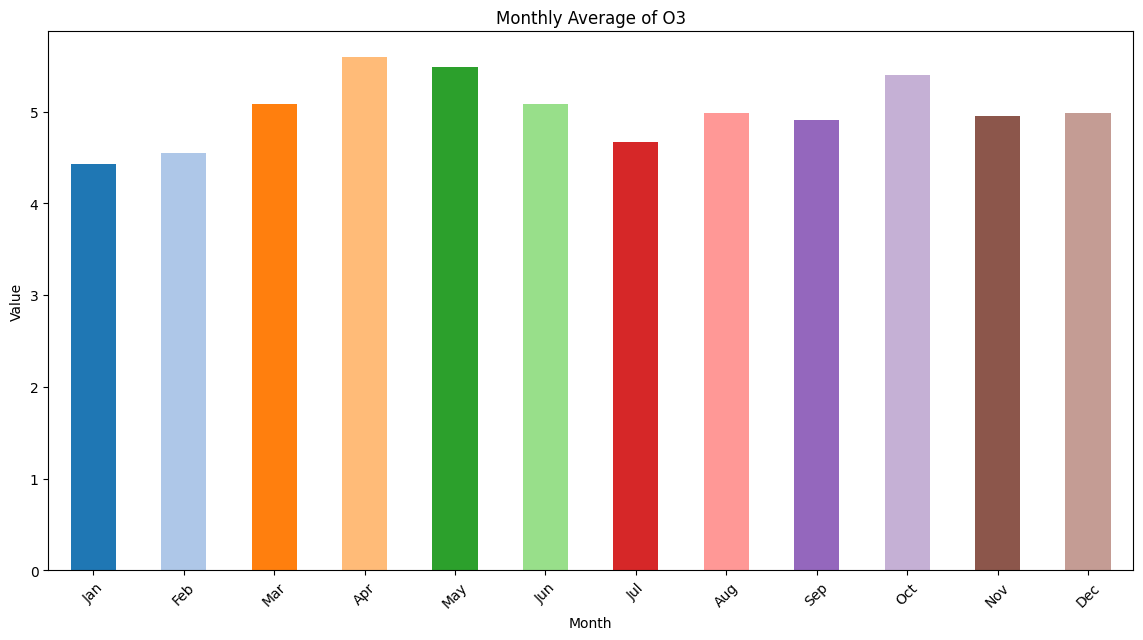

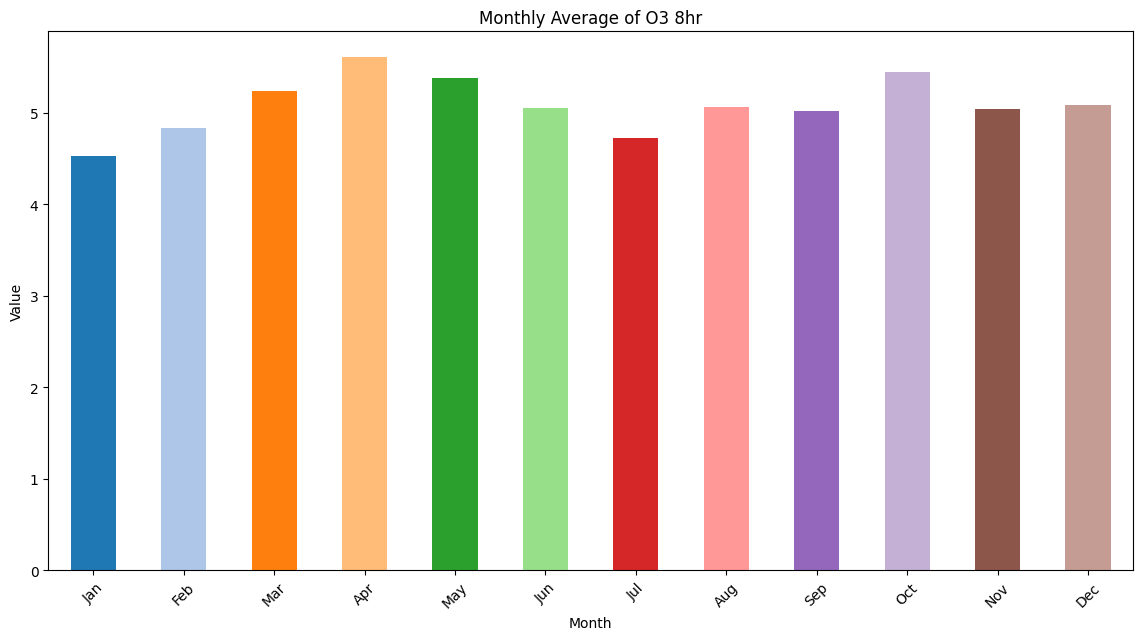

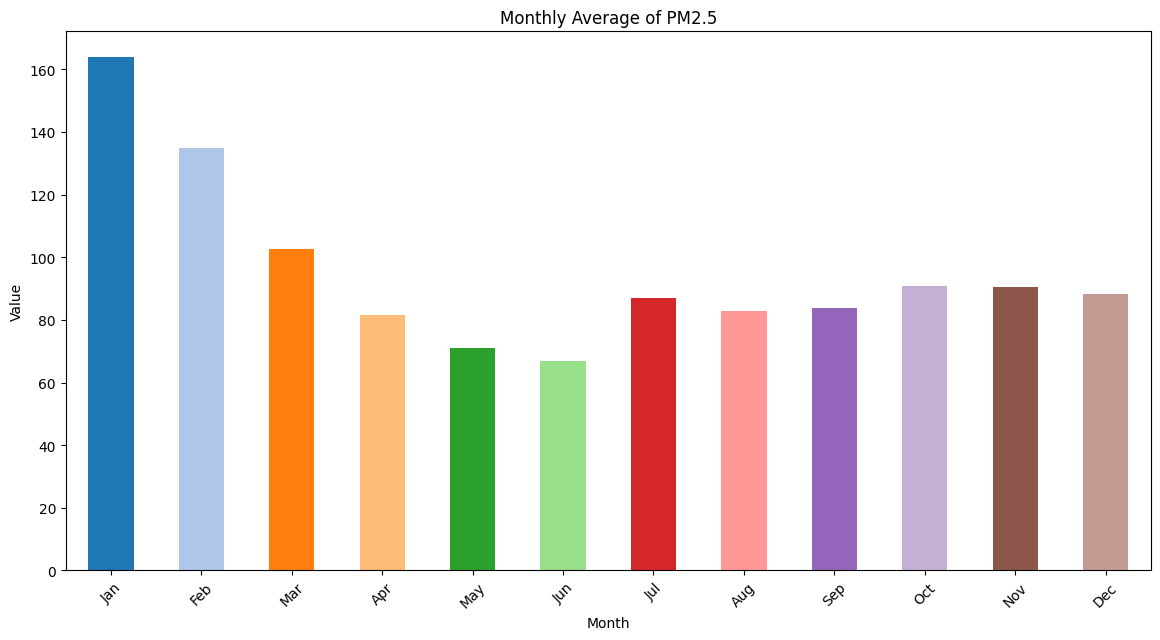

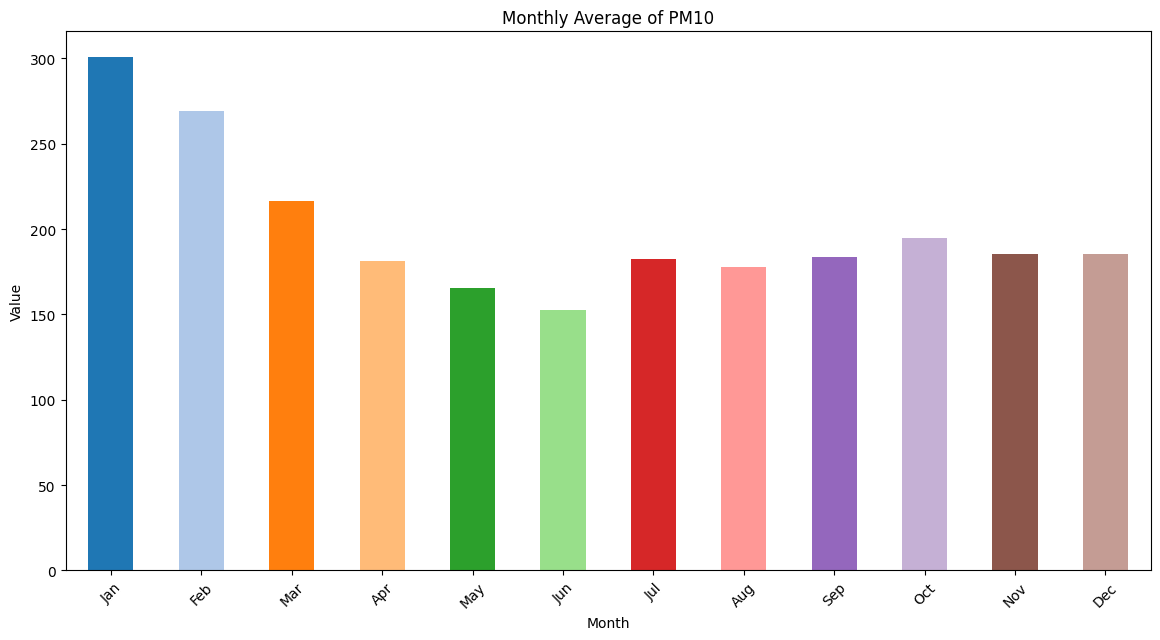

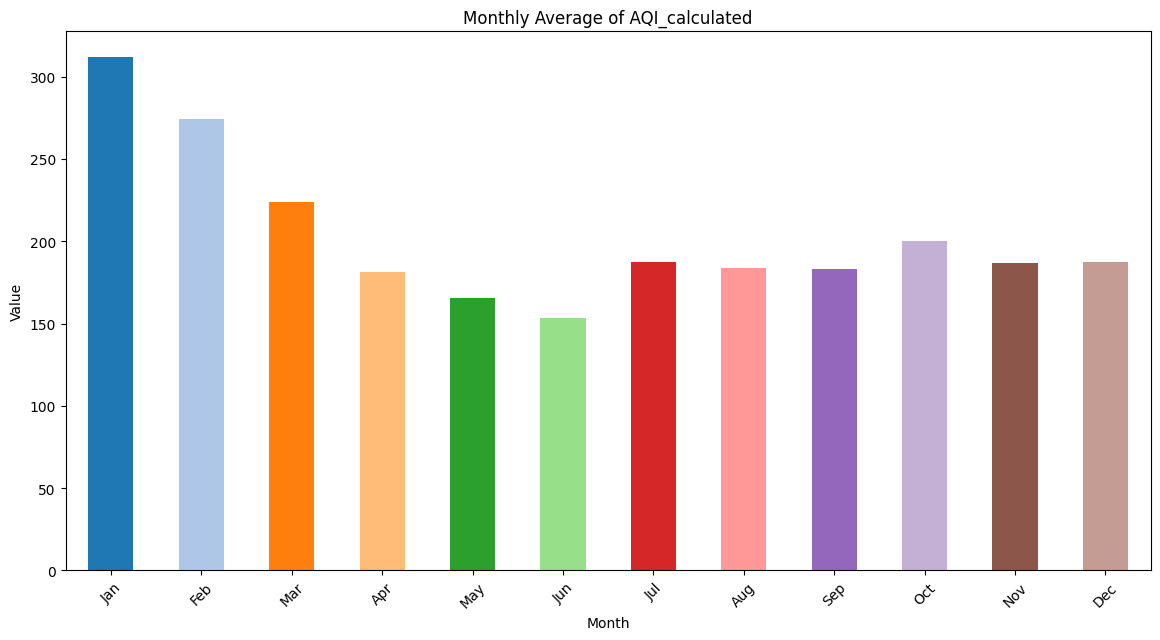

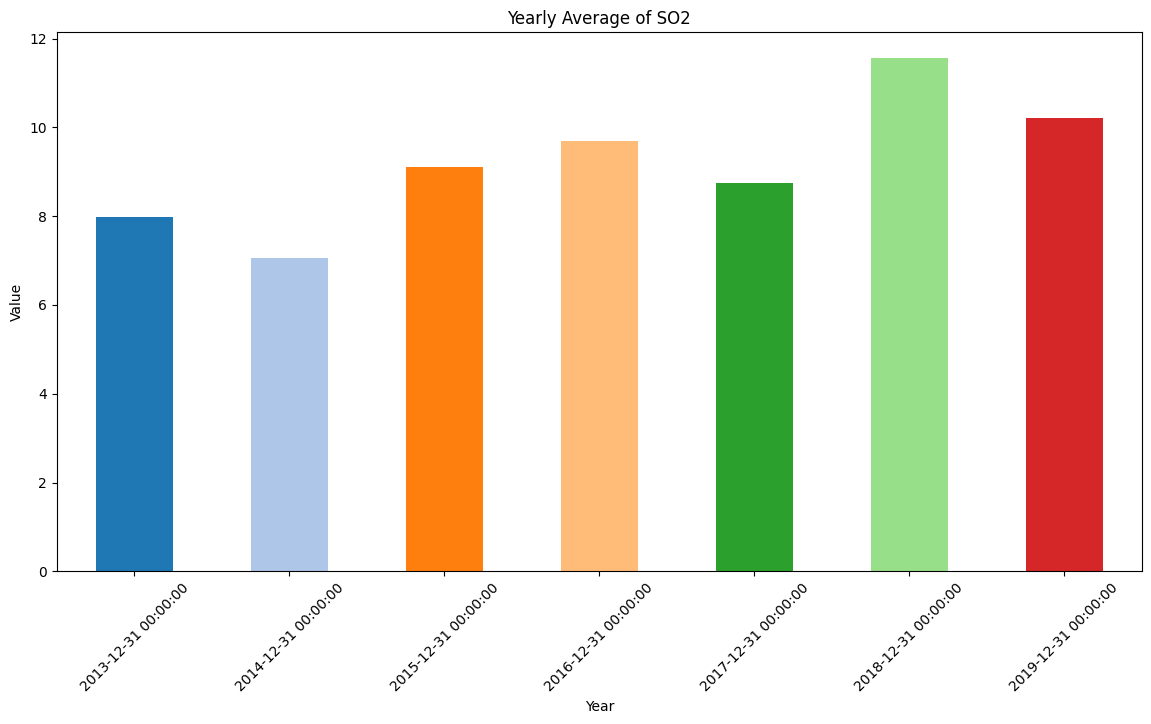

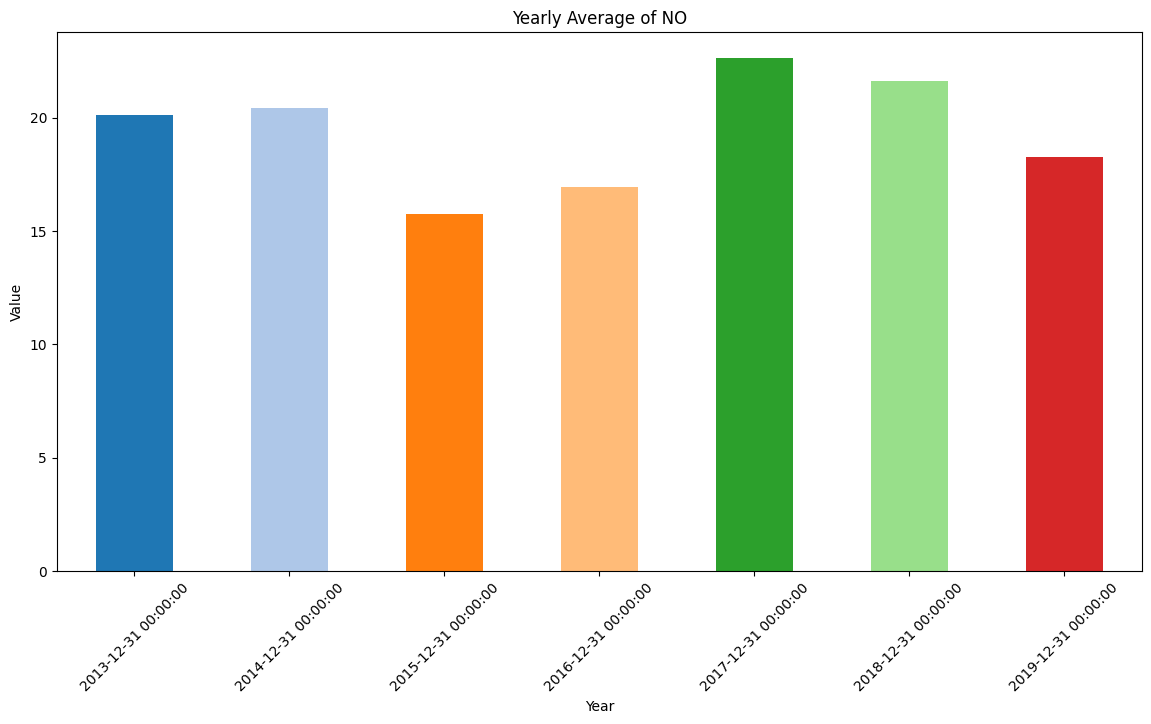

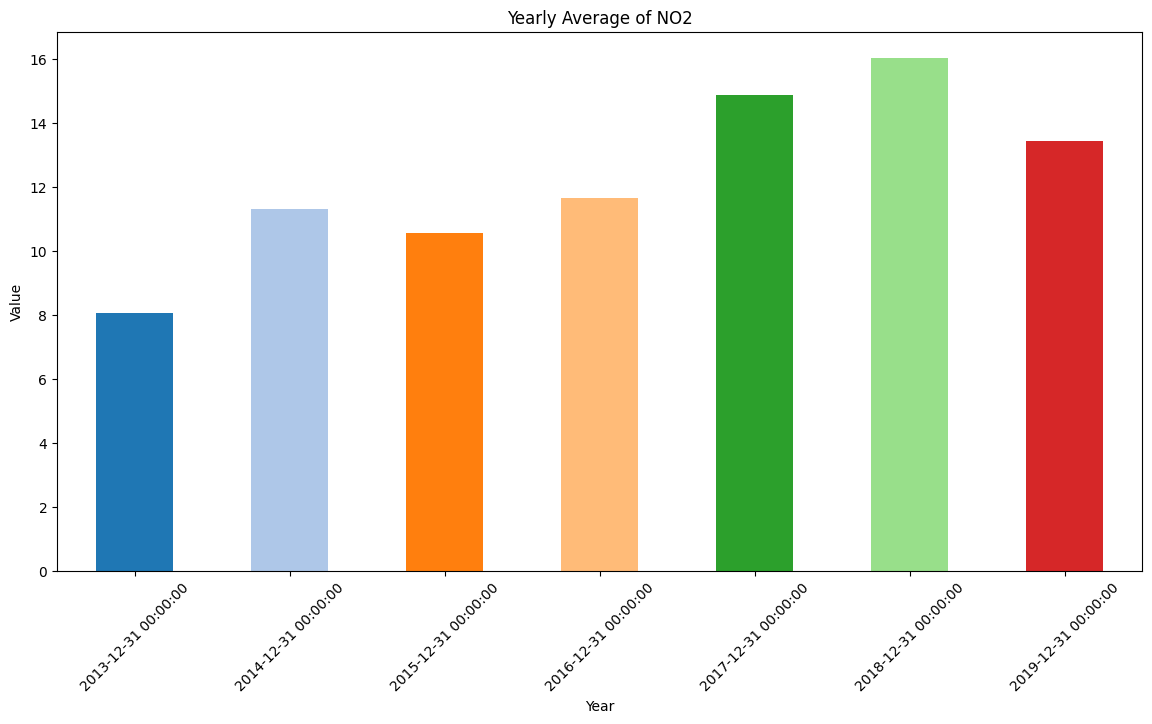

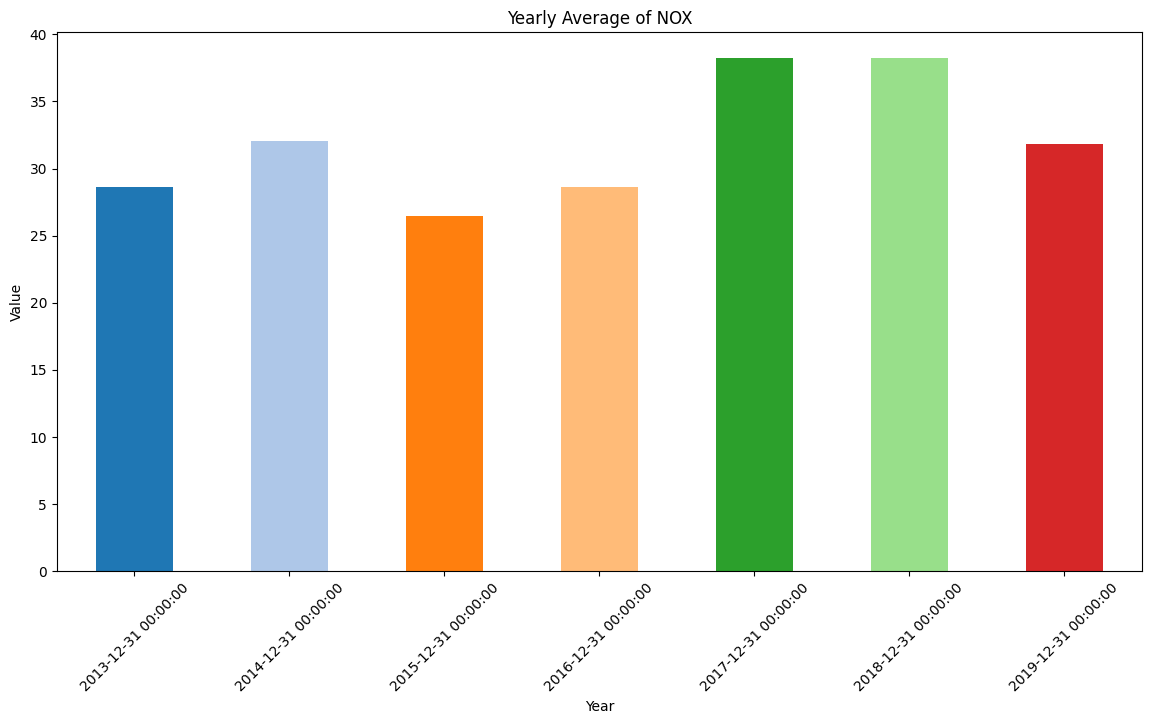

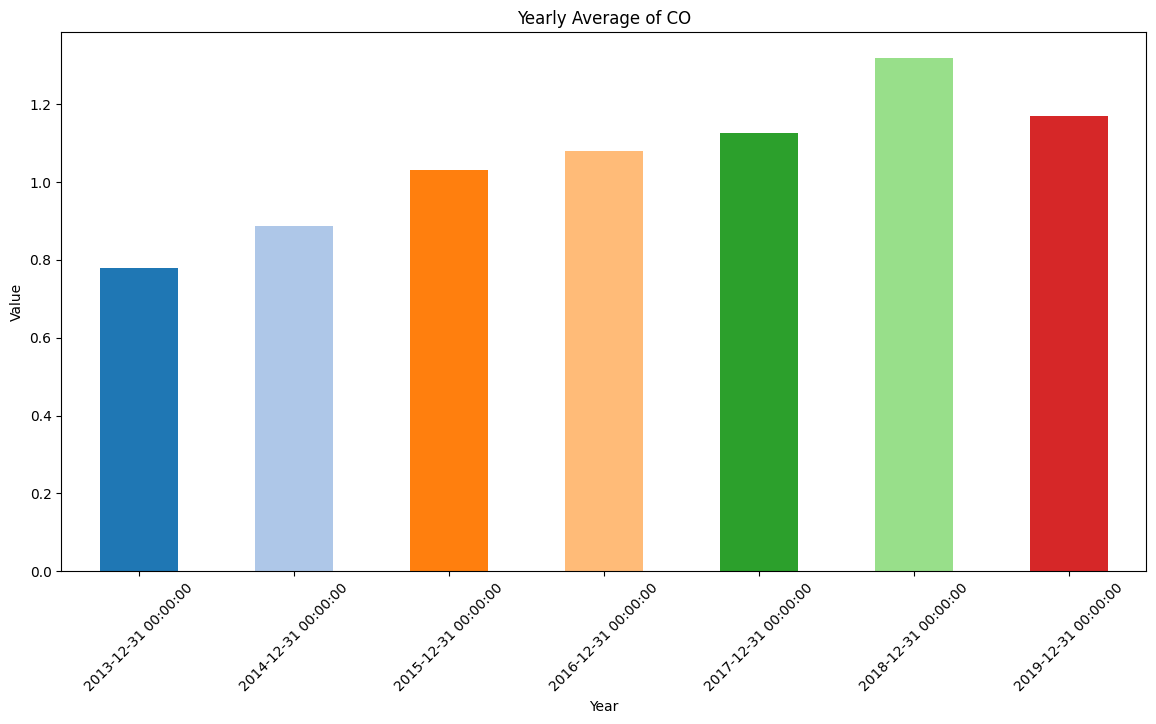

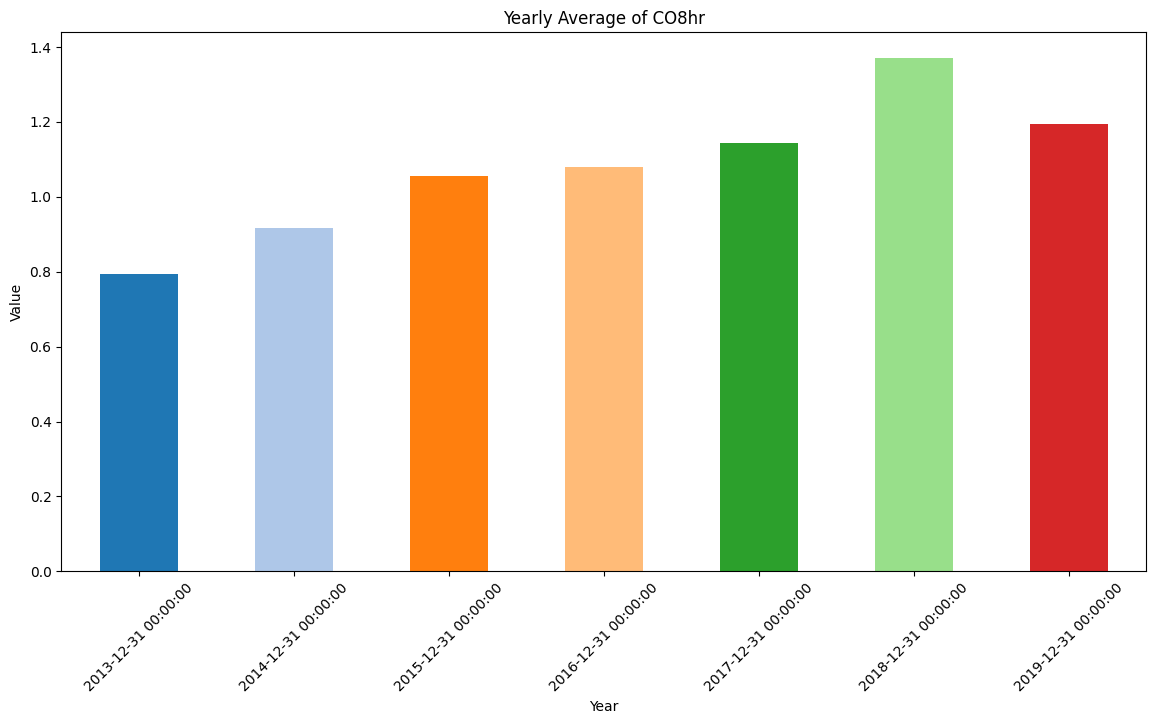

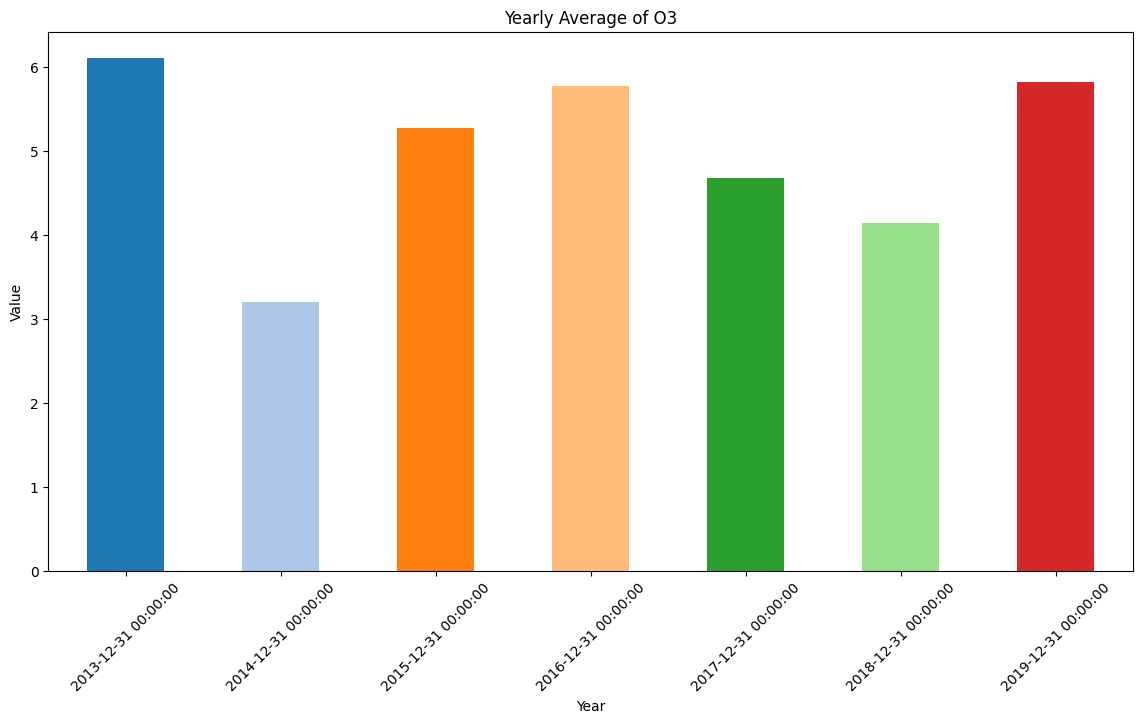

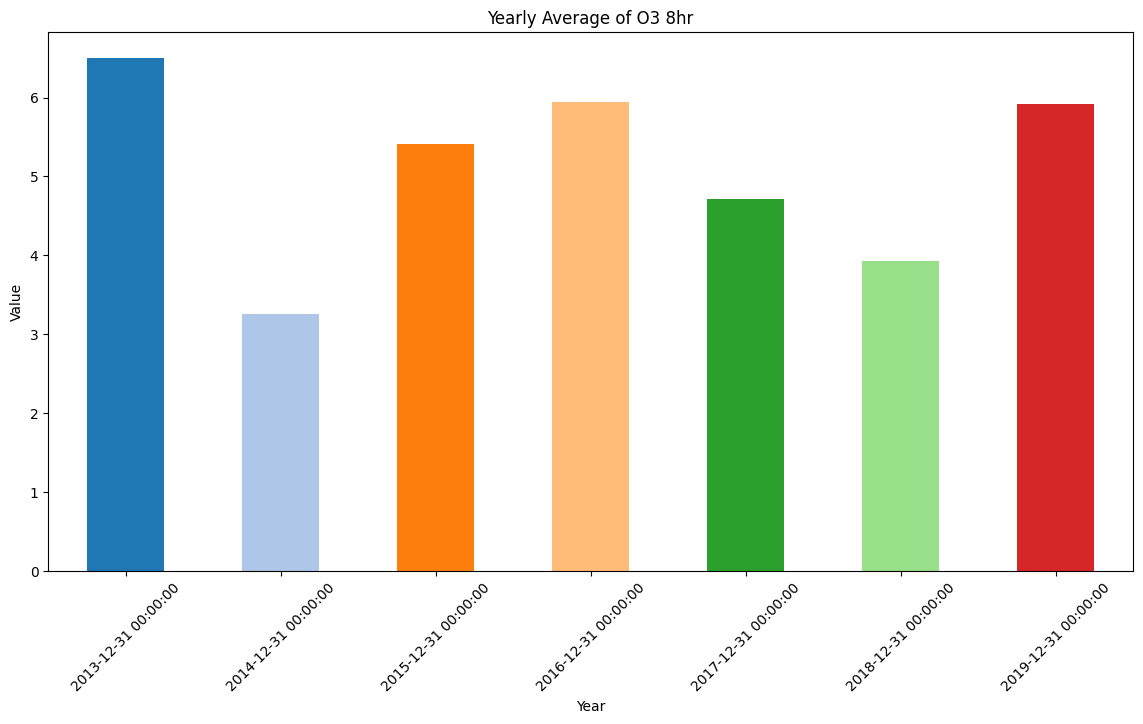

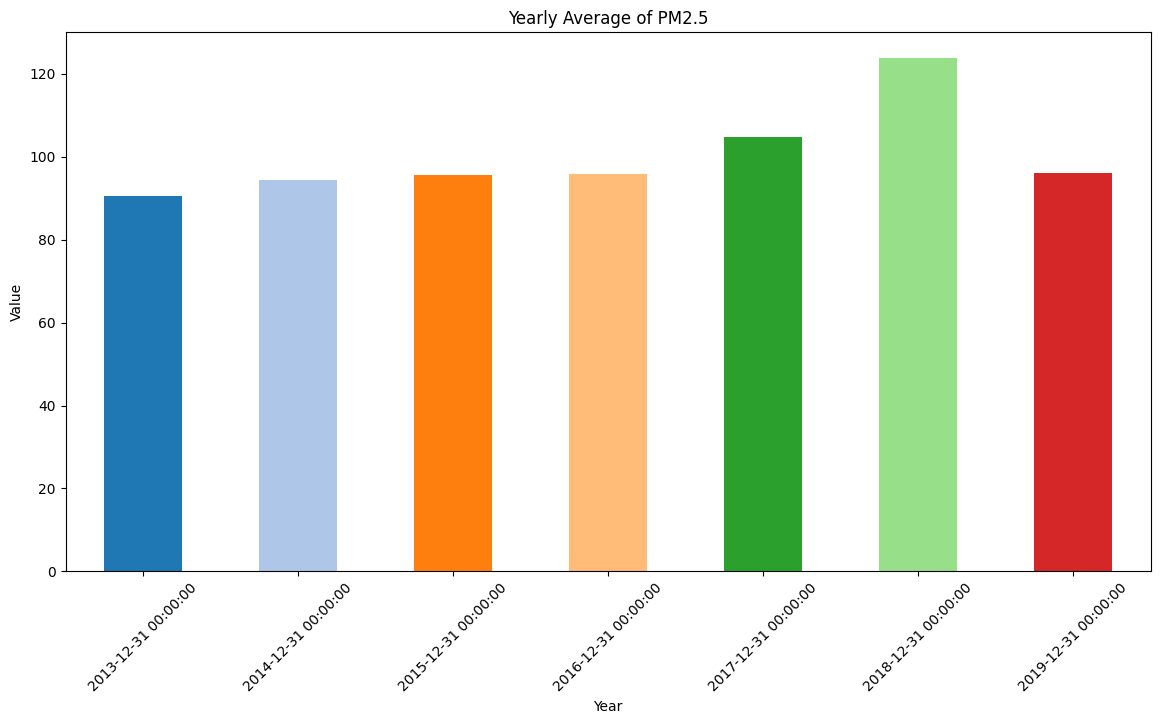

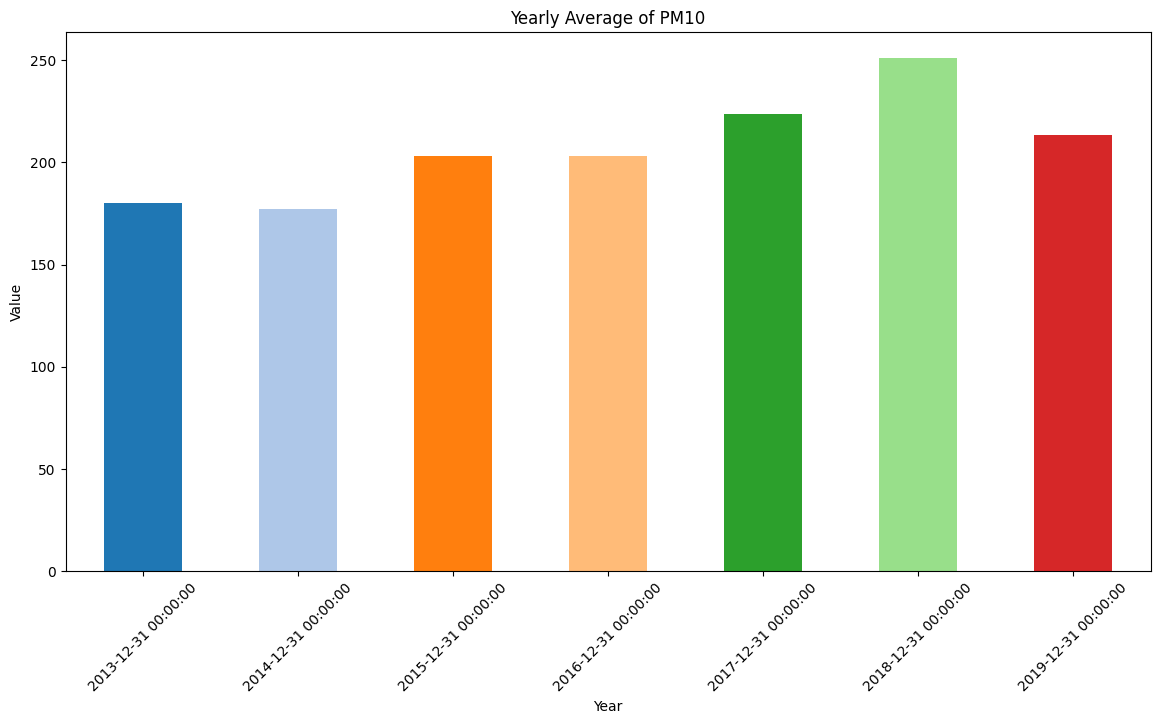

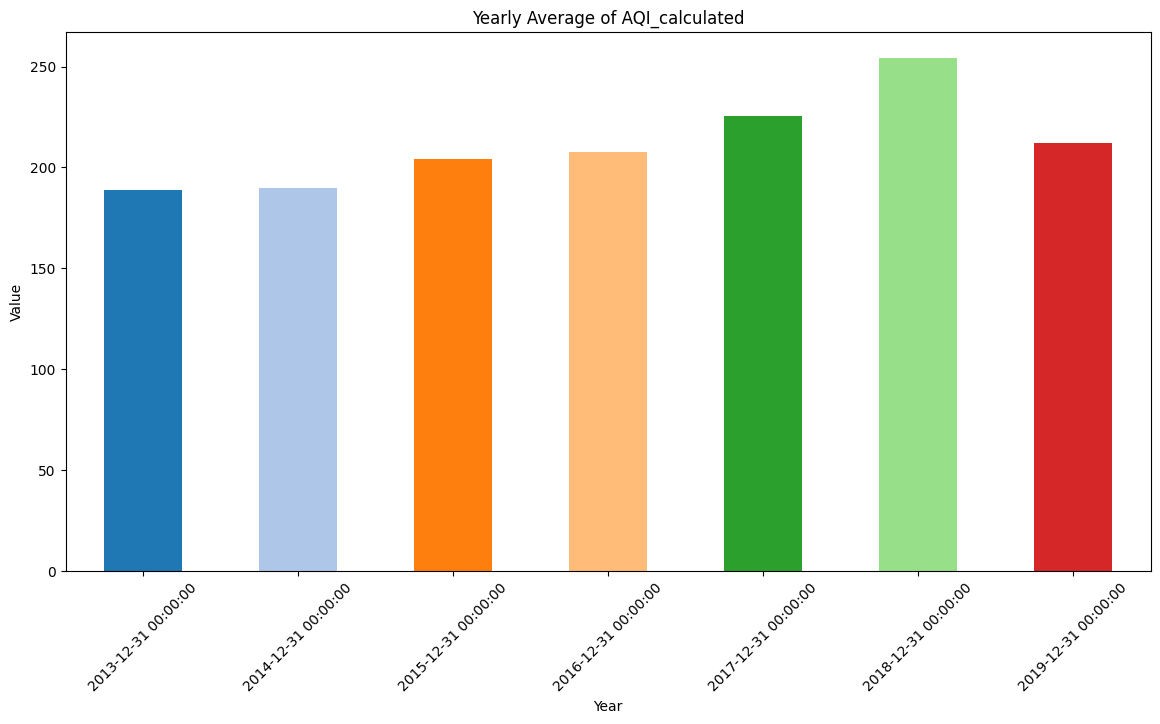

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality_AQI.csv'
data = pd.read_csv(file_path)
import pandas as pd
import matplotlib.pyplot as plt


# Drop the specified columns
columns_to_drop = ['PM2.5_subindex', 'PM10_subindex', 'SO2_subindex', 'NOx_subindex', 'CO_subindex', 'O3_subindex', 'AQI_bucket_calculated']
data = data.drop(columns=columns_to_drop)


# Parse 'Date_Time' column correctly
data['Date_Time'] = pd.to_datetime(data['Date_Time'], errors='coerce')

# Drop rows where 'Date_Time' could not be parsed
data = data.dropna(subset=['Date_Time'])


# Set 'Date_Time' as the index
data.set_index('Date_Time', inplace=True)

# Calculate daily average values for each pollutant
daily_avg = data.resample('D').mean()

# Calculate monthly average values for each individual month across all years
monthly_avg = data.groupby(data.index.month).mean()
monthly_avg.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate yearly average values for each pollutant
yearly_avg = data.resample('Y').mean()


# Plot monthly average values as bar charts
for column in monthly_avg.columns:
    plt.figure(figsize=(14, 7))
    monthly_avg[column].plot(kind='bar', color=plt.cm.tab20.colors, title=f'Monthly Average of {column}')
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.show()

# Plot yearly average values as bar charts
for column in yearly_avg.columns:
    plt.figure(figsize=(14, 7))
    yearly_avg[column].plot(kind='bar', color=plt.cm.tab20.colors, title=f'Yearly Average of {column}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7620481927710844
Confusion Matrix:
 [[  0  10   0   0   0   0]
 [  0  35  18   0   0   0]
 [  0   2  99   5   0   0]
 [  0   0  19  16  13   0]
 [  0   0   2   1 103   0]
 [  0   0   0   0   9   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.74      0.66      0.70        53
           2       0.72      0.93      0.81       106
           3       0.73      0.33      0.46        48
           4       0.82      0.97      0.89       106
           5       0.00      0.00      0.00         9

    accuracy                           0.76       332
   macro avg       0.50      0.48      0.48       332
weighted avg       0.72      0.76      0.72       332



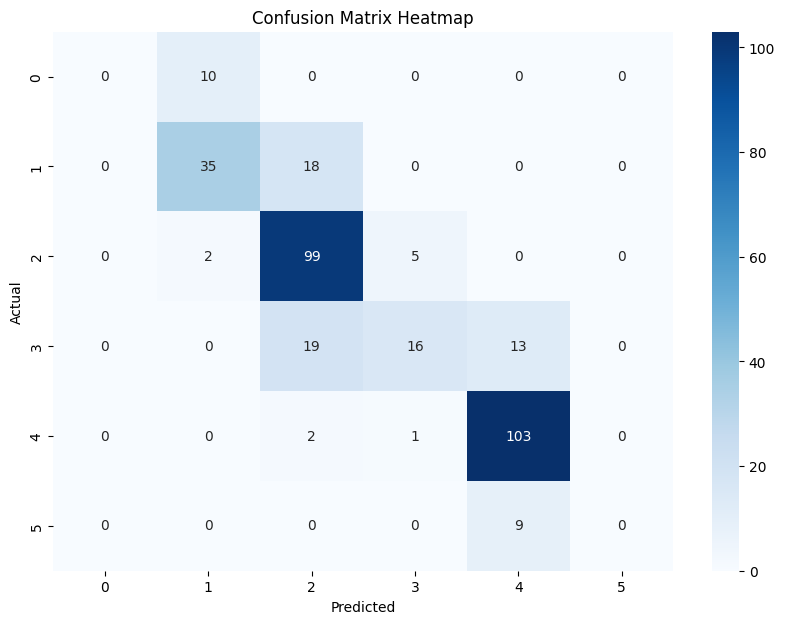

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality_AQI.csv'
data = pd.read_csv(file_path)

# Drop the specified columns
columns_to_drop = ['Date_Time', 'PM2.5_subindex', 'PM10_subindex', 'SO2_subindex', 'NOx_subindex', 'CO_subindex', 'O3_subindex', 'AQI_calculated']
data = data.drop(columns=columns_to_drop)

# Separate features and target
X = data.drop(columns=['AQI_bucket_calculated'])
y = data['AQI_bucket_calculated']

# Apply MinMax scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


Accuracy: 0.9879518072289156
Confusion Matrix:
 [[ 10   0   0   0   0   0]
 [  0  53   0   0   0   0]
 [  0   0 106   0   0   0]
 [  0   0   0  48   0   0]
 [  0   0   0   1 105   0]
 [  0   0   0   0   3   6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00       106
           3       0.98      1.00      0.99        48
           4       0.97      0.99      0.98       106
           5       1.00      0.67      0.80         9

    accuracy                           0.99       332
   macro avg       0.99      0.94      0.96       332
weighted avg       0.99      0.99      0.99       332



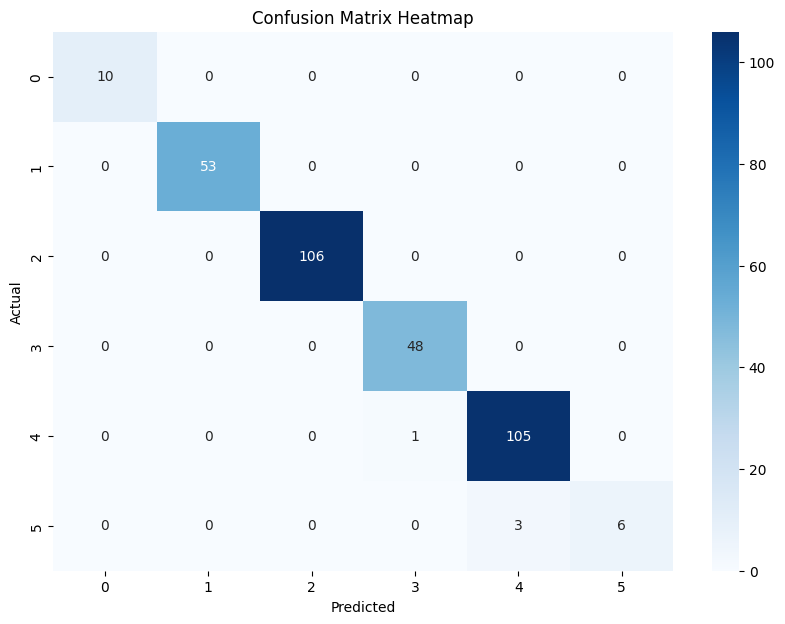

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality_AQI.csv'
data = pd.read_csv(file_path)

# Drop the specified columns
columns_to_drop = ['Date_Time', 'PM2.5_subindex', 'PM10_subindex', 'SO2_subindex', 'NOx_subindex', 'CO_subindex', 'O3_subindex', 'AQI_calculated']
data = data.drop(columns=columns_to_drop)

# Separate features and target
X = data.drop(columns=['AQI_bucket_calculated'])
y = data['AQI_bucket_calculated']

# Apply MinMax scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8493975903614458
Confusion Matrix:
 [[  0  10   0   0   0   0]
 [  0  50   3   0   0   0]
 [  0   6  91   9   0   0]
 [  0   0   4  40   4   0]
 [  0   0   0   5 101   0]
 [  0   0   0   0   9   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.76      0.94      0.84        53
           2       0.93      0.86      0.89       106
           3       0.74      0.83      0.78        48
           4       0.89      0.95      0.92       106
           5       0.00      0.00      0.00         9

    accuracy                           0.85       332
   macro avg       0.55      0.60      0.57       332
weighted avg       0.81      0.85      0.83       332



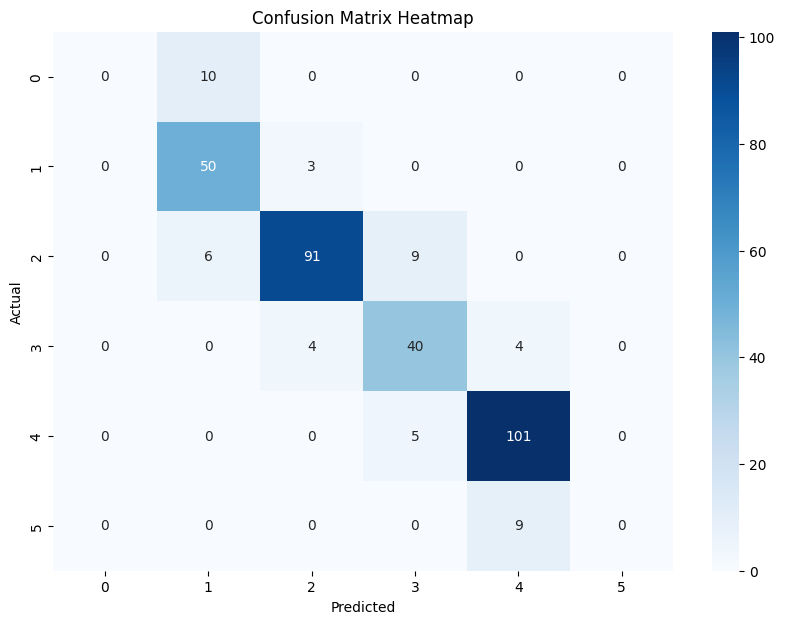

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality_AQI.csv'
data = pd.read_csv(file_path)

# Drop the specified columns
columns_to_drop = ['Date_Time', 'PM2.5_subindex', 'PM10_subindex', 'SO2_subindex', 'NOx_subindex', 'CO_subindex', 'O3_subindex', 'AQI_calculated']
data = data.drop(columns=columns_to_drop)

# Separate features and target
X = data.drop(columns=['AQI_bucket_calculated'])
y = data['AQI_bucket_calculated']

# Apply MinMax scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train a Support Vector Classifier
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

# Predict on the test set
y_pred = svc.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


Epoch 1/1000
13/13 [==============================] - 2s 31ms/step - loss: 1.8439 - accuracy: 0.1462 - val_loss: 1.7138 - val_accuracy: 0.3675
Epoch 2/1000
13/13 [==============================] - 0s 9ms/step - loss: 1.7116 - accuracy: 0.2768 - val_loss: 1.6488 - val_accuracy: 0.4458
Epoch 3/1000
13/13 [==============================] - 0s 9ms/step - loss: 1.6422 - accuracy: 0.3351 - val_loss: 1.5495 - val_accuracy: 0.4367
Epoch 4/1000
13/13 [==============================] - 0s 9ms/step - loss: 1.5730 - accuracy: 0.3532 - val_loss: 1.4569 - val_accuracy: 0.4307
Epoch 5/1000
13/13 [==============================] - 0s 13ms/step - loss: 1.5233 - accuracy: 0.3700 - val_loss: 1.3838 - val_accuracy: 0.5090
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 1.4865 - accuracy: 0.4114 - val_loss: 1.3196 - val_accuracy: 0.5361
Epoch 7/1000
13/13 [==============================] - 0s 10ms/step - loss: 1.4029 - accuracy: 0.4670 - val_loss: 1.2545 - val_accuracy: 0.5753
Ep

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


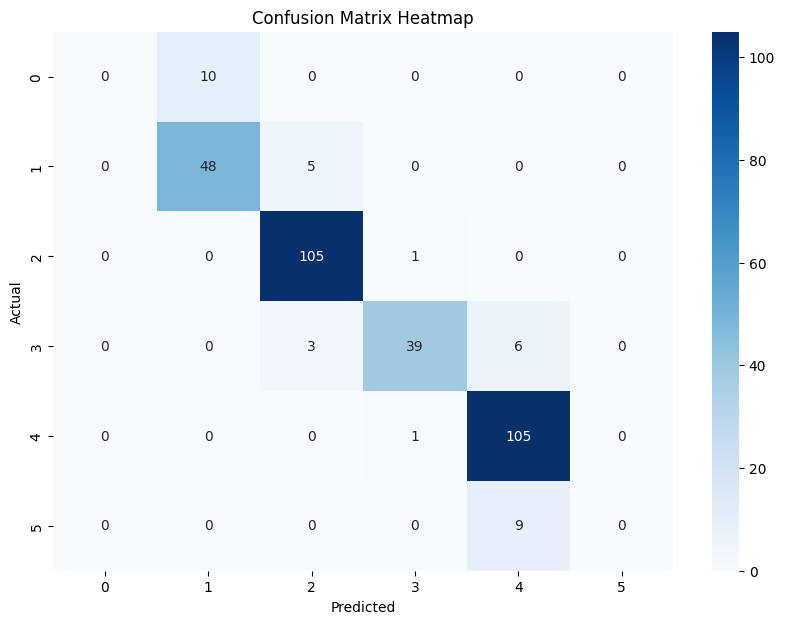

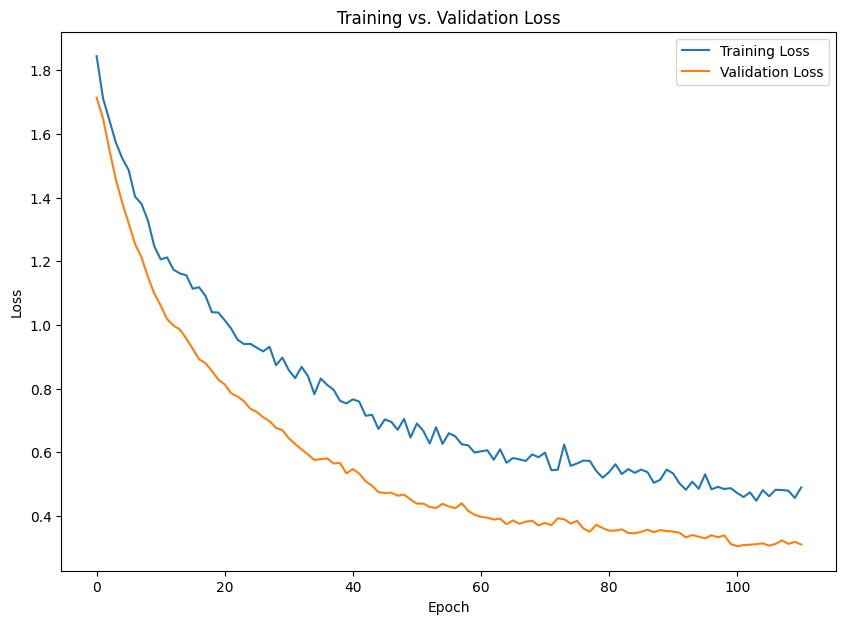

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/narayenhanj_air_quality_AQI.csv'
data = pd.read_csv(file_path)

# Drop the specified columns
columns_to_drop = ['Date_Time', 'PM2.5_subindex', 'PM10_subindex', 'SO2_subindex', 'NOx_subindex', 'CO_subindex', 'O3_subindex', 'AQI_calculated']
data = data.drop(columns=columns_to_drop)

# Separate features and target
X = data.drop(columns=['AQI_bucket_calculated'])
y = data['AQI_bucket_calculated']

# Apply MinMax scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target column
y_encoded = tf.keras.utils.to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y)

# Define the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_test_class, y_pred)
conf_matrix = confusion_matrix(y_test_class, y_pred)
class_report = classification_report(y_test_class, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Plot training vs. validation loss
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()
